# 02.1 Análisis Visual Exploratorio Completo
## Sistema Integral Multi-Capa para la Detección de Desinformación

**Objetivo**: Realizar un análisis visual exhaustivo de los datos para entender patrones, distribuciones, correlaciones y anomalías a través de múltiples visualizaciones.

### Plan de Visualización:
1. **Análisis de Distribuciones** - Histogramas, boxplots, violin plots
2. **Análisis de Correlaciones** - Heatmaps, scatter plots, pair plots
3. **Análisis de Clases** - Balance, distribuciones por clase
4. **Detección de Outliers** - Boxplots, scatter plots, análisis Z-score
5. **Análisis de Características Lingüísticas** - Patrones textuales
6. **Análisis de Redes Sociales** - Métricas de usuarios
7. **Análisis Temporal** - Si hay información temporal
8. **Análisis Multivariado** - PCA, t-SNE, clustering visual

In [2]:
# Instalar librerías faltantes
%pip install pandas numpy matplotlib seaborn plotly scipy scikit-learn

# Importaciones esenciales para análisis visual
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
from scipy import stats
from scipy.stats import zscore, skew, kurtosis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import os

# Configuración de visualizaciones
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configurar tamaños de gráficos
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 10

print("Librerías de visualización cargadas")
print("Configuración de plots establecida")
print("Paletas de colores activas")


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Librerías de visualización cargadas
Configuración de plots establecida
Paletas de colores activas


## 1. Carga de Datos

In [3]:
# Cargar el dataset original para análisis visual completo
print("Cargando dataset original para análisis visual...")
df_original = pd.read_csv('../dataset1/Features_For_Traditional_ML_Techniques.csv')

# También cargar datos procesados si existen
try:
    df_processed = pd.read_csv('../processed_data/dataset_features_processed.csv')
    text_data = pd.read_csv('../processed_data/text_data_for_nlp.csv')
    print("Datos procesados también disponibles")
except:
    print("Usando solo datos originales")
    df_processed = None
    text_data = None

print(f"Dataset original: {df_original.shape[0]:,} filas × {df_original.shape[1]} columnas")
print(f"Memoria utilizada: {df_original.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

# Vista rápida
print("\nVista previa:")
display(df_original.head(3))

Cargando dataset original para análisis visual...
Datos procesados también disponibles
Dataset original: 134,198 filas × 64 columnas
Memoria utilizada: 124.3 MB

Vista previa:


,Unnamed: 0,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,...,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
0,0,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,4262.0,3619.0,34945.0,16423.0,44.0,...,0,0,5,0,1,0,33,3,5,19
1,1,True,End of eviction moratorium means millions of A...,1.0,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1393.0,1621.0,31436.0,37184.0,64.0,...,0,2,1,0,0,0,14,0,2,34
2,2,True,End of eviction moratorium means millions of A...,1.0,THE SUPREME COURT is siding with super rich pr...,9.0,84.0,219.0,1184.0,0.0,...,0,1,0,0,0,0,3,0,4,10


## 2. Análisis Visual de Distribuciones

### 2.1 Distribuciones de Variables Numéricas Clave

In [4]:
# Identificar variables numéricas clave para análisis
numeric_cols = df_original.select_dtypes(include=[np.number]).columns.tolist()
social_media_cols = ['followers_count', 'friends_count', 'favourites_count', 'statuses_count', 'listed_count']
engagement_cols = ['mentions', 'quotes', 'replies', 'retweets', 'favourites', 'hashtags', 'URLs']
linguistic_cols = ['Word count', 'Max word length', 'Min word length', 'Average word length']
bot_cols = ['BotScore', 'BotScoreBinary', 'cred', 'normalize_influence']

# Filtrar solo las que existen
social_media_cols = [col for col in social_media_cols if col in df_original.columns]
engagement_cols = [col for col in engagement_cols if col in df_original.columns]
linguistic_cols = [col for col in linguistic_cols if col in df_original.columns]
bot_cols = [col for col in bot_cols if col in df_original.columns]

print(f"Métricas de Redes Sociales: {len(social_media_cols)} variables")
print(f"Métricas de Engagement: {len(engagement_cols)} variables")
print(f"Métricas Lingüísticas: {len(linguistic_cols)} variables")
print(f"Métricas de Bot/Credibilidad: {len(bot_cols)} variables")

Métricas de Redes Sociales: 5 variables
Métricas de Engagement: 7 variables
Métricas Lingüísticas: 4 variables
Métricas de Bot/Credibilidad: 4 variables


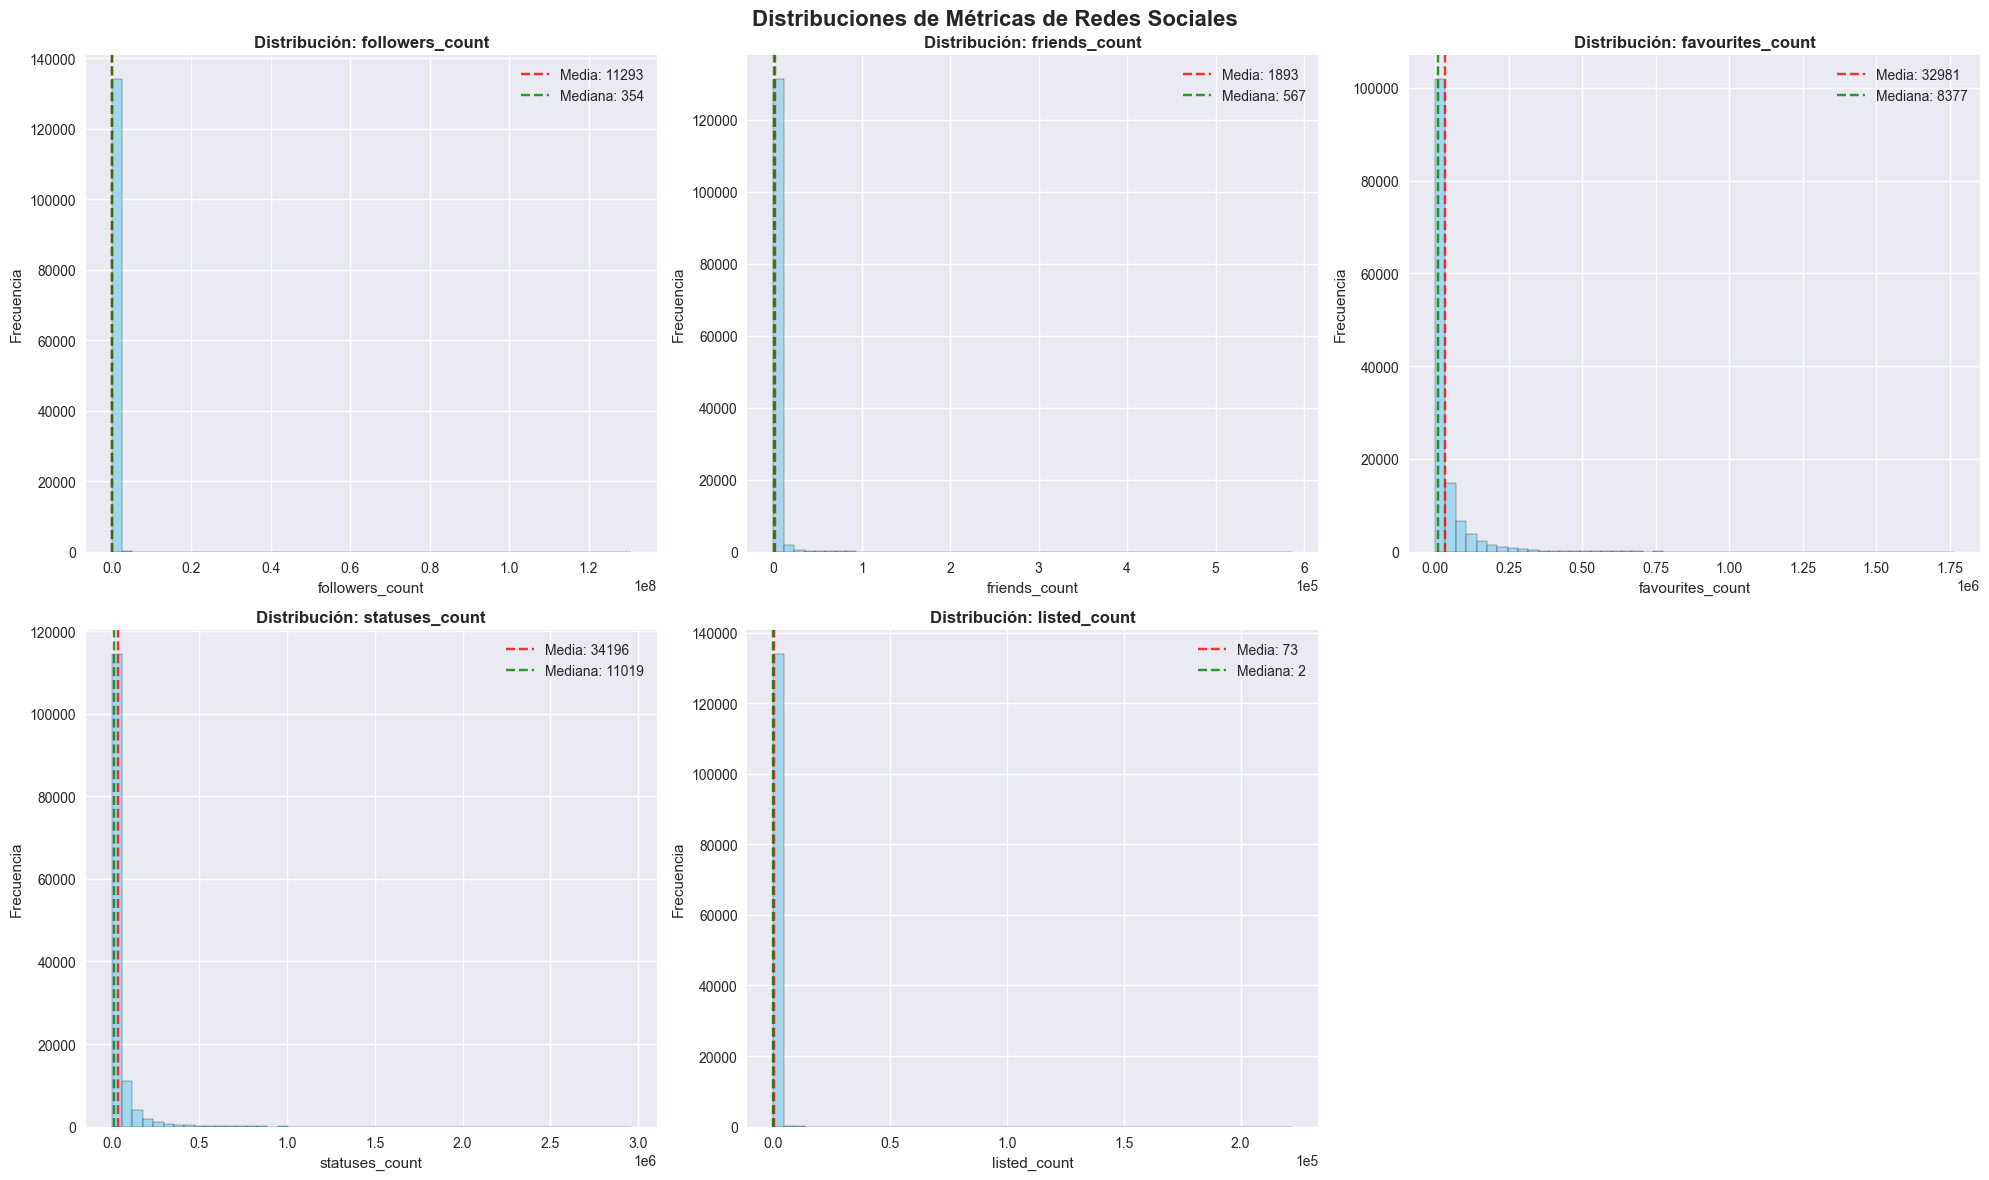

In [5]:
# ANÁLISIS 1: Distribuciones de Métricas de Redes Sociales
if social_media_cols:
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()
    
    for i, col in enumerate(social_media_cols[:6]):
        # Histograma con transformación log para mejor visualización
        data = df_original[col].replace(0, 0.1)  # Evitar log(0)
        
        # Subplot normal
        axes[i].hist(data, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Distribución: {col}', fontweight='bold', fontsize=12)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')
        
        # Estadísticas en el gráfico
        mean_val = df_original[col].mean()
        median_val = df_original[col].median()
        axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Media: {mean_val:.0f}')
        axes[i].axvline(median_val, color='green', linestyle='--', alpha=0.8, label=f'Mediana: {median_val:.0f}')
        axes[i].legend(fontsize=10)
        
        # Formato de números grandes
        axes[i].ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
    
    # Ocultar ejes vacíos
    for i in range(len(social_media_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.suptitle('Distribuciones de Métricas de Redes Sociales', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

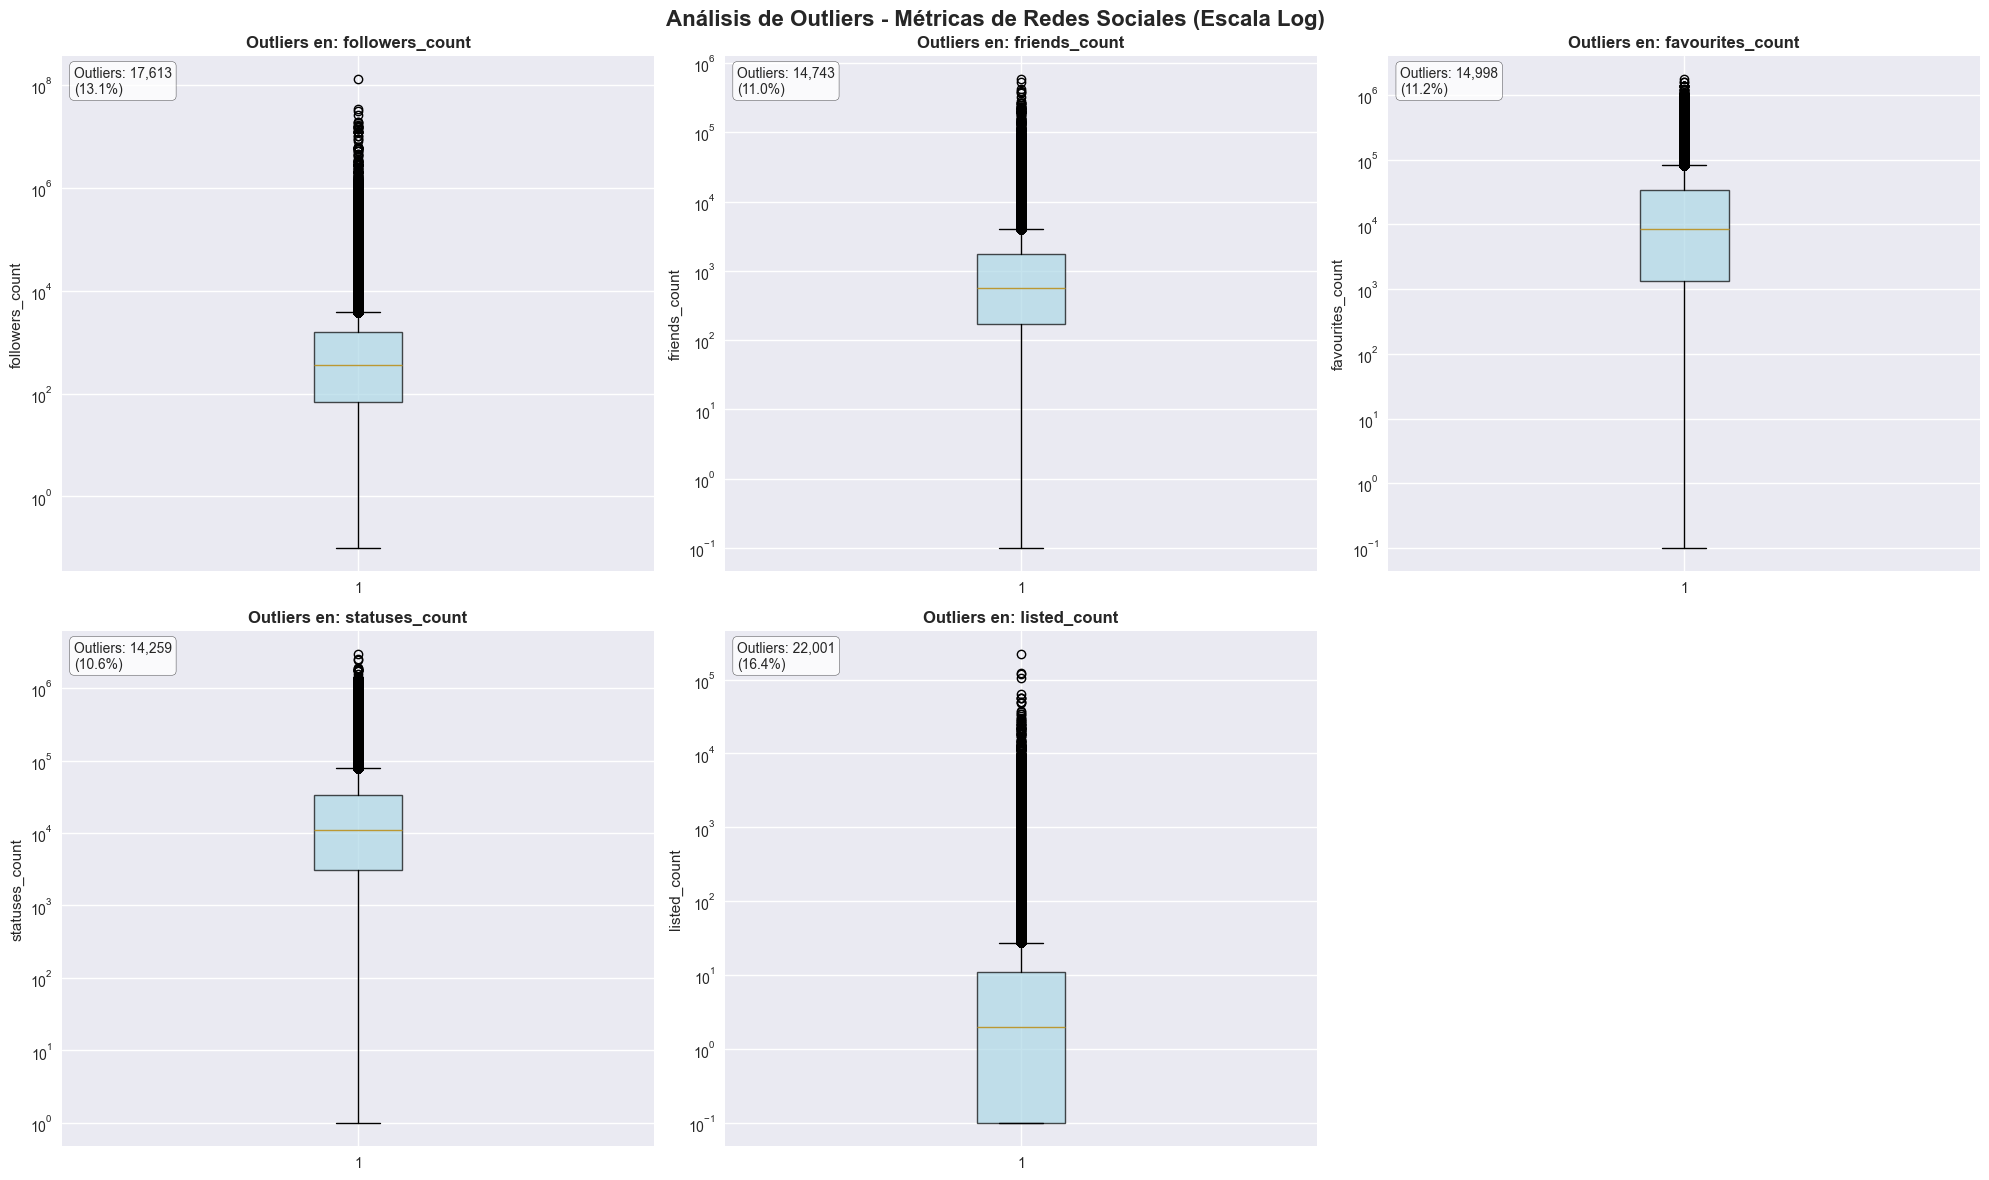

In [6]:
# ANÁLISIS 2: Boxplots para detectar outliers en métricas sociales
if social_media_cols:
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()
    
    for i, col in enumerate(social_media_cols[:6]):
        # Boxplot con escala log para mejor visualización
        data = df_original[col].replace(0, 0.1)
        
        # Crear boxplot
        bp = axes[i].boxplot(data, patch_artist=True, vert=True)
        bp['boxes'][0].set_facecolor('lightblue')
        bp['boxes'][0].set_alpha(0.7)
        
        axes[i].set_title(f'Outliers en: {col}', fontweight='bold', fontsize=12)
        axes[i].set_ylabel(col)
        axes[i].set_yscale('log')
        
        # Estadísticas de outliers
        Q1 = df_original[col].quantile(0.25)
        Q3 = df_original[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df_original[(df_original[col] < Q1 - 1.5*IQR) | (df_original[col] > Q3 + 1.5*IQR)]
        
        axes[i].text(0.02, 0.98, f'Outliers: {len(outliers):,}\n({len(outliers)/len(df_original)*100:.1f}%)', 
                    transform=axes[i].transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Ocultar ejes vacíos
    for i in range(len(social_media_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.suptitle('Análisis de Outliers - Métricas de Redes Sociales (Escala Log)', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

### 2.2 Análisis de Engagement y Interacciones

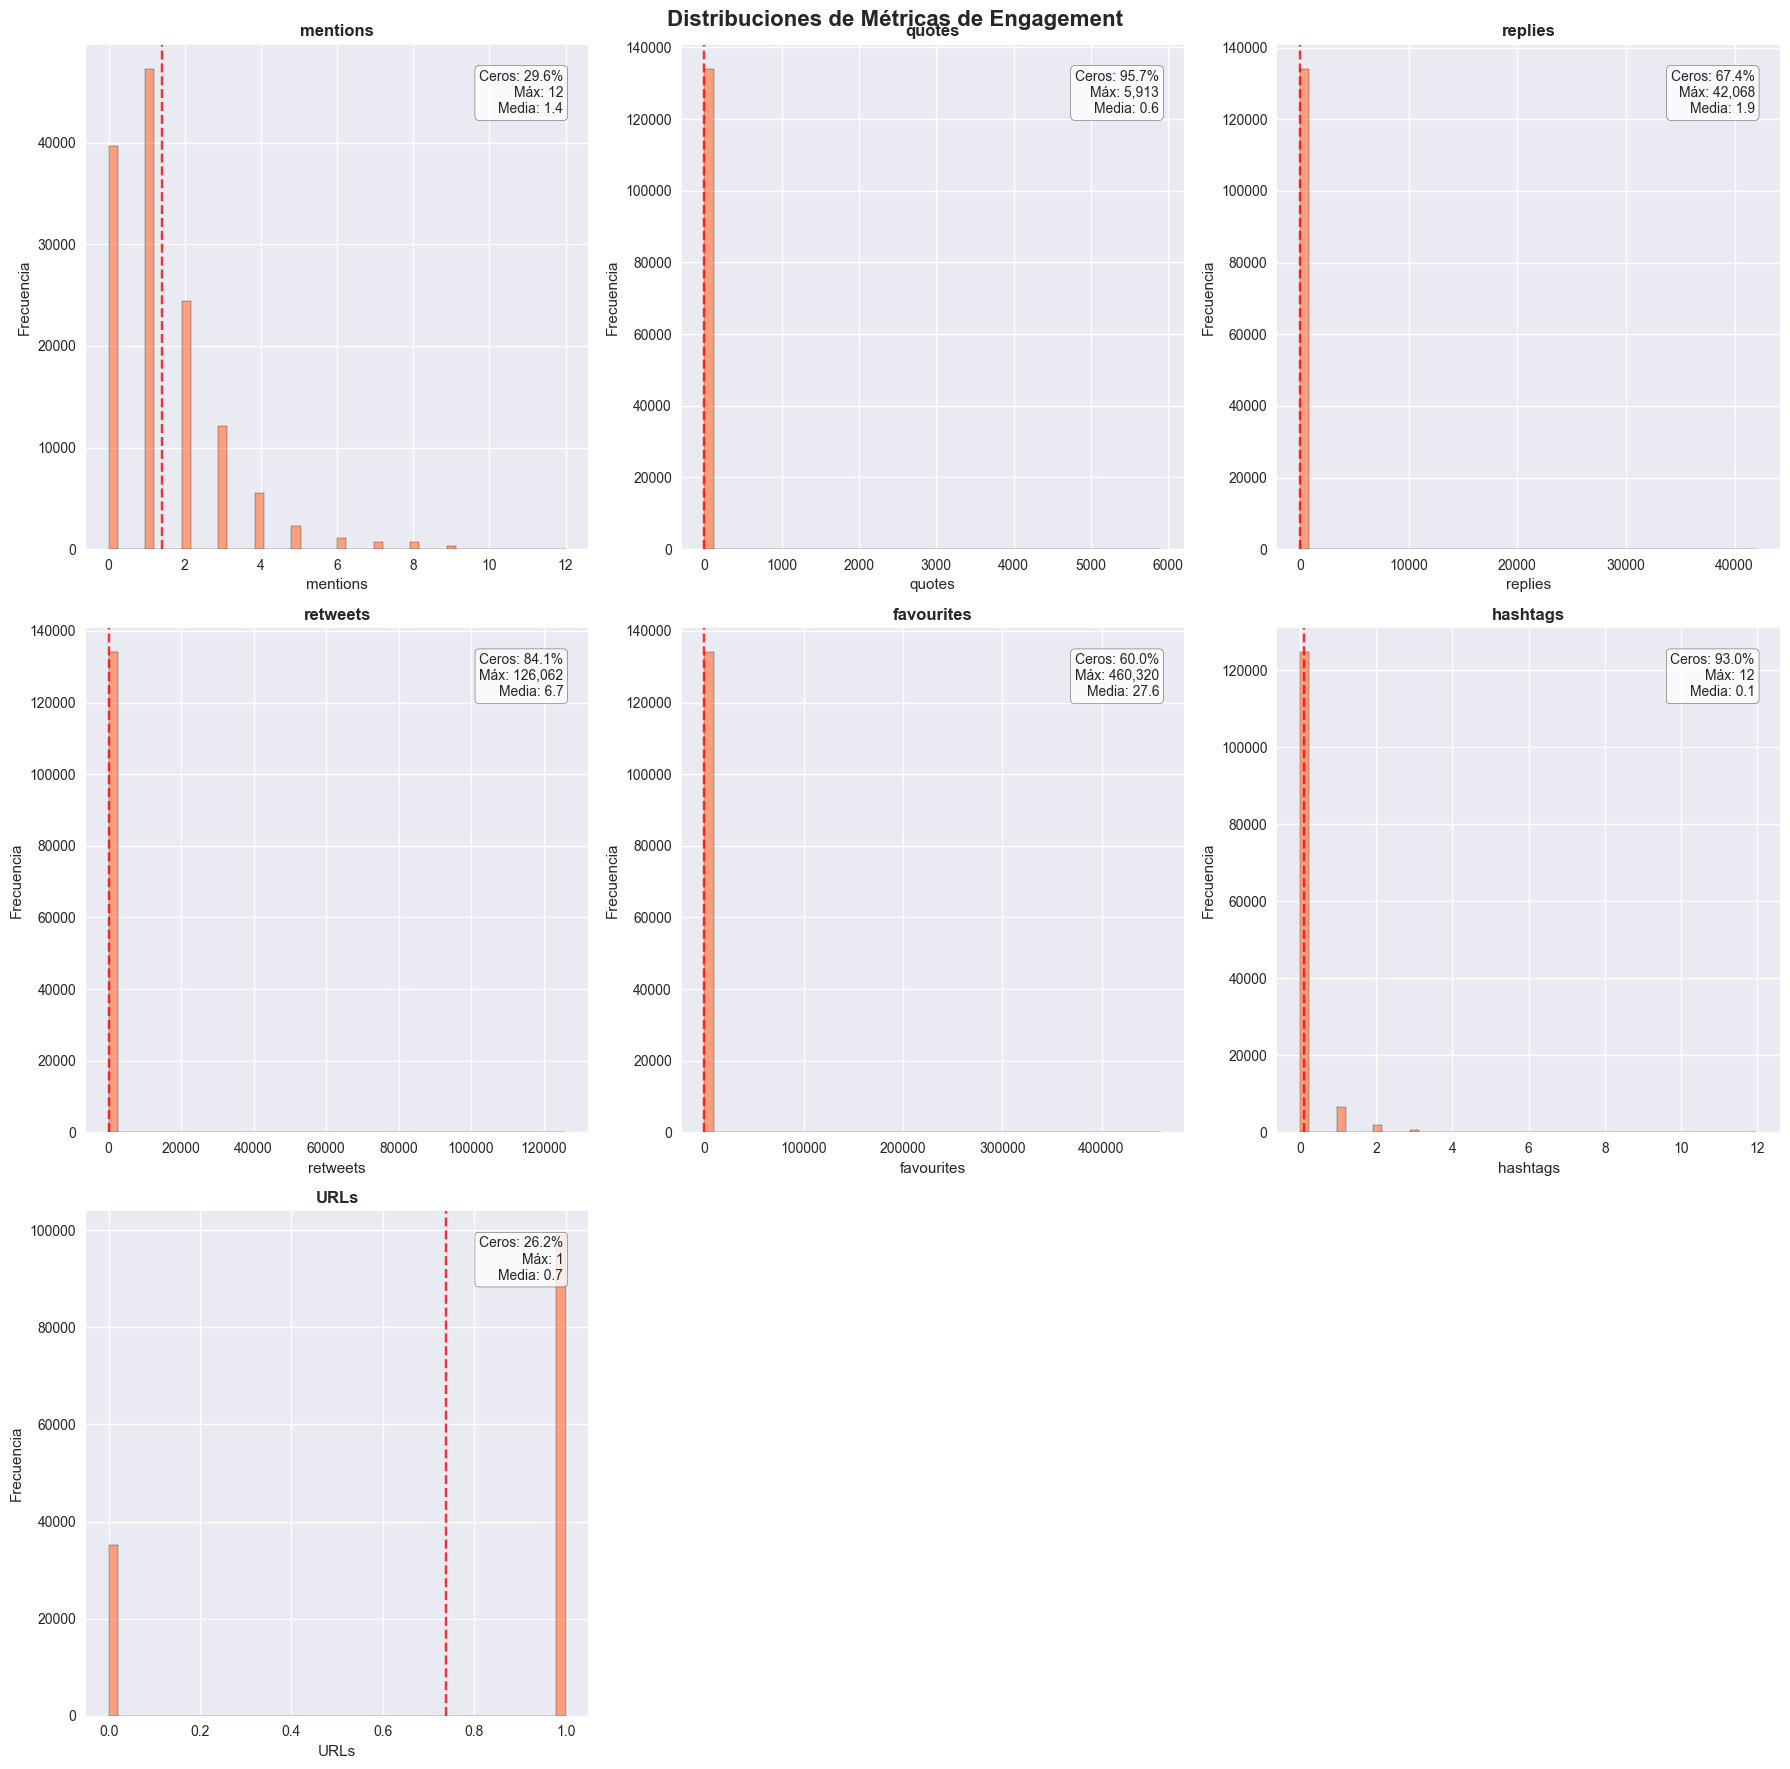

In [7]:
# ANÁLISIS 3: Distribuciones de métricas de engagement
if engagement_cols:
    n_cols = 3
    n_rows = (len(engagement_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes]
    
    for i, col in enumerate(engagement_cols):
        if i < len(axes):
            # Datos con manejo de ceros
            data = df_original[col]
            
            # Histograma
            axes[i].hist(data, bins=50, alpha=0.7, color='coral', edgecolor='black')
            axes[i].set_title(f'{col}', fontweight='bold')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frecuencia')
            
            # Estadísticas clave
            zero_count = (data == 0).sum()
            zero_pct = zero_count / len(data) * 100
            max_val = data.max()
            mean_val = data.mean()
            
            # Texto informativo
            info_text = f'Ceros: {zero_pct:.1f}%\nMáx: {max_val:,.0f}\nMedia: {mean_val:.1f}'
            axes[i].text(0.95, 0.95, info_text, transform=axes[i].transAxes, 
                        verticalalignment='top', horizontalalignment='right',
                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            
            # Línea de media
            axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.8)
    
    # Ocultar ejes vacíos
    for i in range(len(engagement_cols), len(axes)):
        axes[i].set_visible(False)

    plt.suptitle('Distribuciones de Métricas de Engagement', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

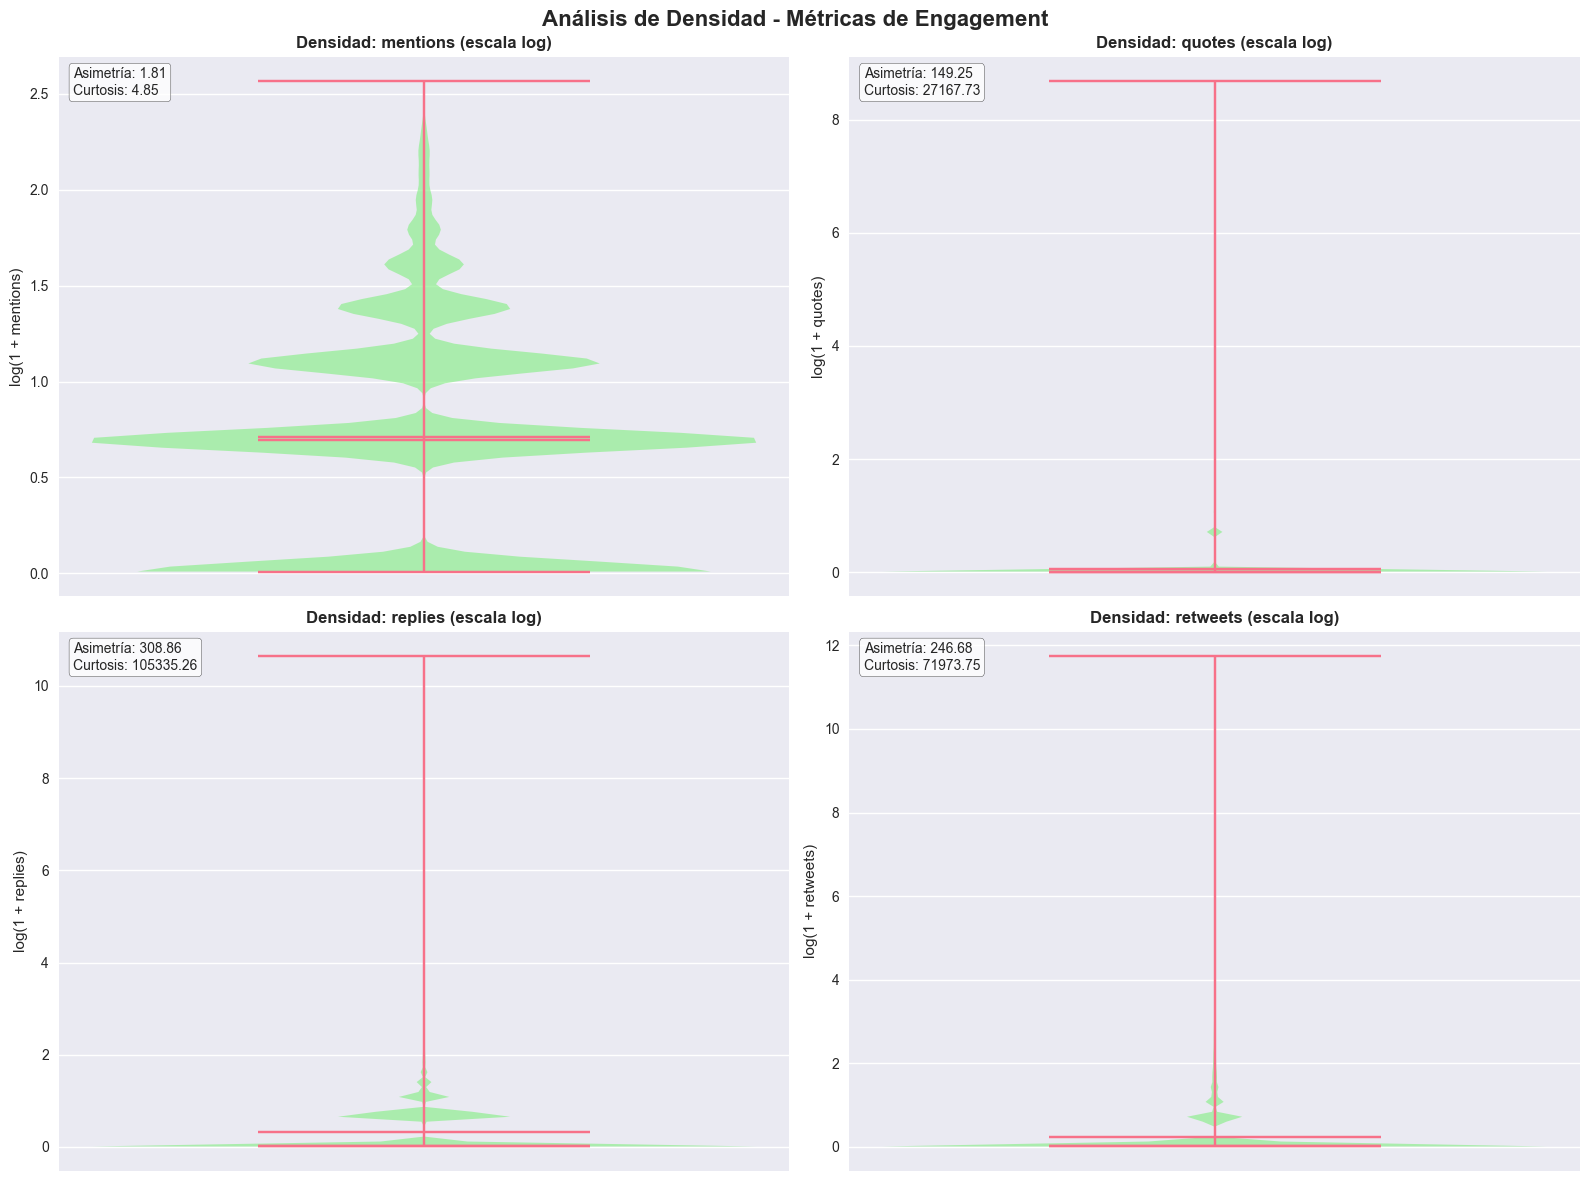

In [8]:
# ANÁLISIS 4: Violin plots para mostrar distribuciones densas
if len(engagement_cols) >= 4:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    for i, col in enumerate(engagement_cols[:4]):
        # Violin plot con datos transformados para mejor visualización
        data = df_original[col].replace(0, 0.01)  # Reemplazar ceros para log
        log_data = np.log1p(data)  # log(1+x) para manejar valores pequeños
        
        parts = axes[i].violinplot([log_data], positions=[0], showmeans=True, showmedians=True)
        
        # Colorear
        for part in parts['bodies']:
            part.set_facecolor('lightgreen')
            part.set_alpha(0.7)
        
        axes[i].set_title(f'Densidad: {col} (escala log)', fontweight='bold')
        axes[i].set_ylabel(f'log(1 + {col})')
        axes[i].set_xticks([])
        
        # Estadísticas
        skewness = skew(data)
        kurt = kurtosis(data)
        
        stats_text = f'Asimetría: {skewness:.2f}\nCurtosis: {kurt:.2f}'
        axes[i].text(0.02, 0.98, stats_text, transform=axes[i].transAxes, 
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.suptitle('Análisis de Densidad - Métricas de Engagement', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

### 2.3 Análisis de Características Lingüísticas

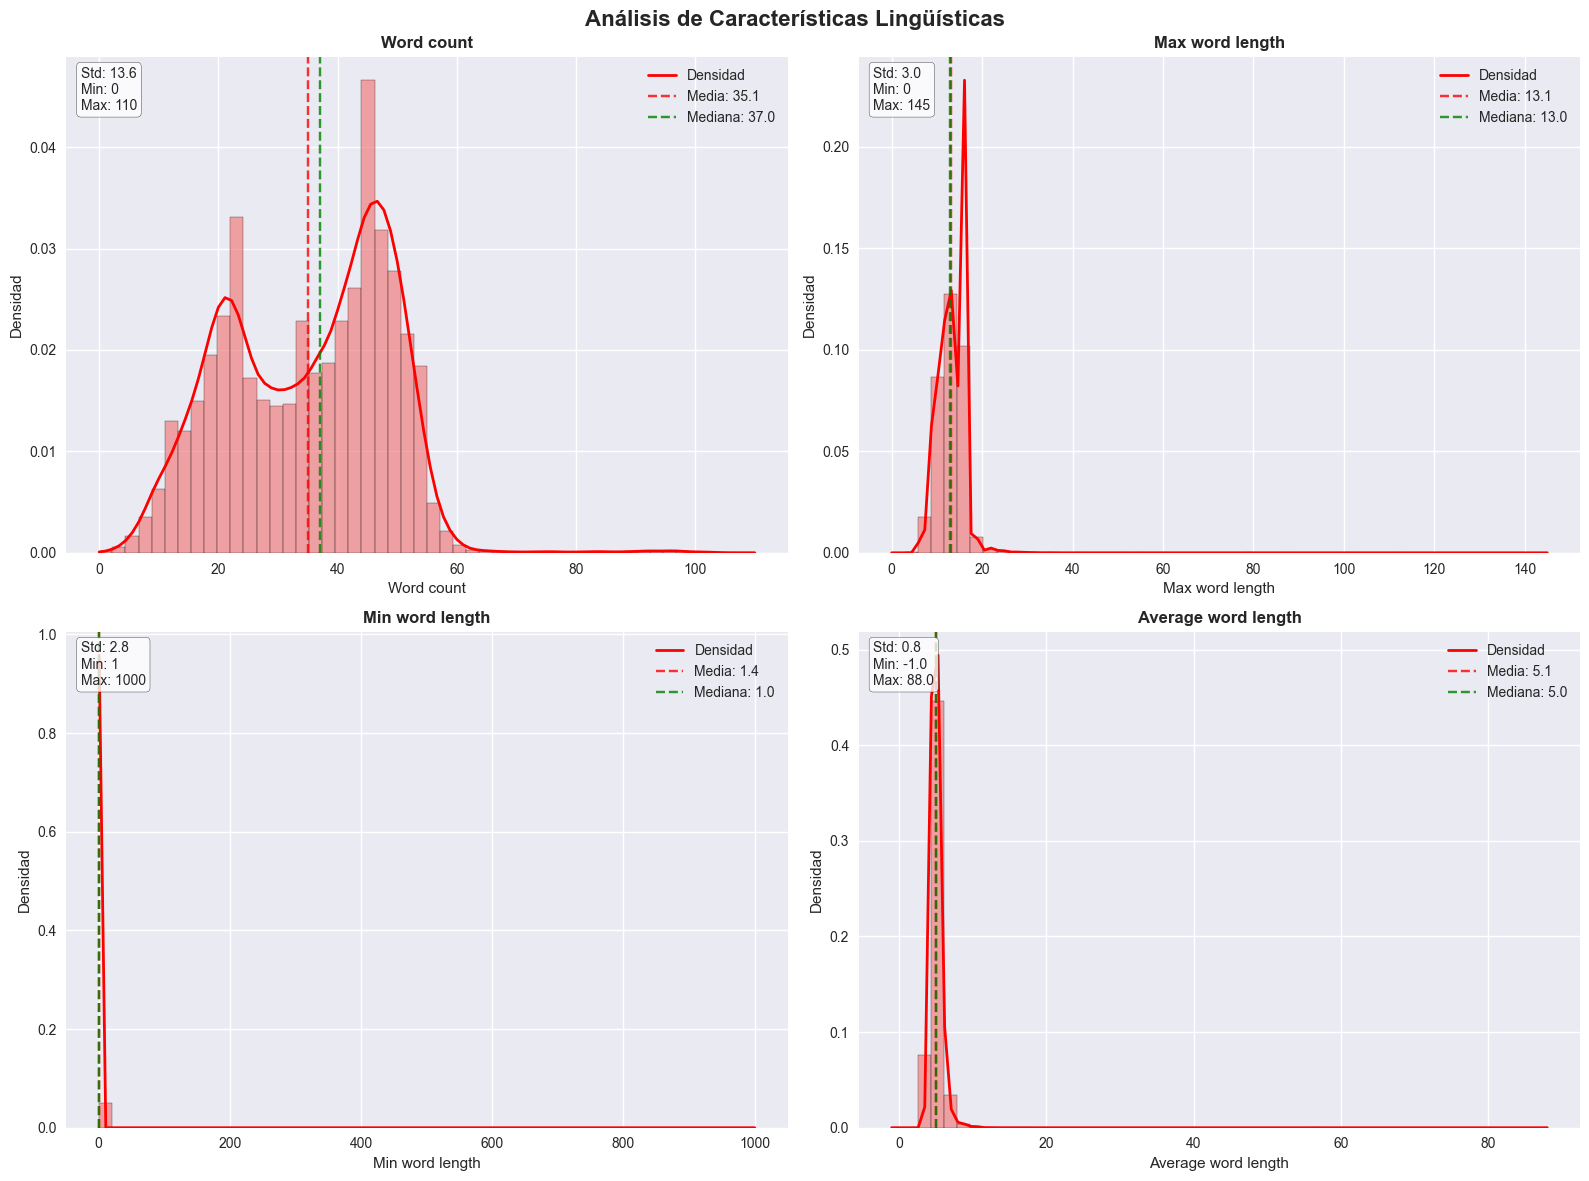

In [9]:
# ANÁLISIS 5: Características lingüísticas
if linguistic_cols:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    for i, col in enumerate(linguistic_cols[:4]):
        data = df_original[col]
        
        # Histograma con curva de densidad
        axes[i].hist(data, bins=50, alpha=0.7, color='lightcoral', edgecolor='black', density=True)
        
        # Agregar curva de densidad
        if len(data.dropna()) > 0:
            try:
                from scipy.stats import gaussian_kde
                kde = gaussian_kde(data.dropna())
                x_range = np.linspace(data.min(), data.max(), 100)
                axes[i].plot(x_range, kde(x_range), 'r-', lw=2, label='Densidad')
            except:
                pass
        
        axes[i].set_title(f'{col}', fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Densidad')
        
        # Estadísticas descriptivas
        mean_val = data.mean()
        median_val = data.median()
        std_val = data.std()
        
        axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Media: {mean_val:.1f}')
        axes[i].axvline(median_val, color='green', linestyle='--', alpha=0.8, label=f'Mediana: {median_val:.1f}')
        
        axes[i].legend()
        
        # Información adicional
        info_text = f'Std: {std_val:.1f}\nMin: {data.min()}\nMax: {data.max()}'
        axes[i].text(0.02, 0.98, info_text, transform=axes[i].transAxes, 
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Ocultar ejes vacíos
    for i in range(len(linguistic_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.suptitle('Análisis de Características Lingüísticas', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

## 3. Análisis de Correlaciones

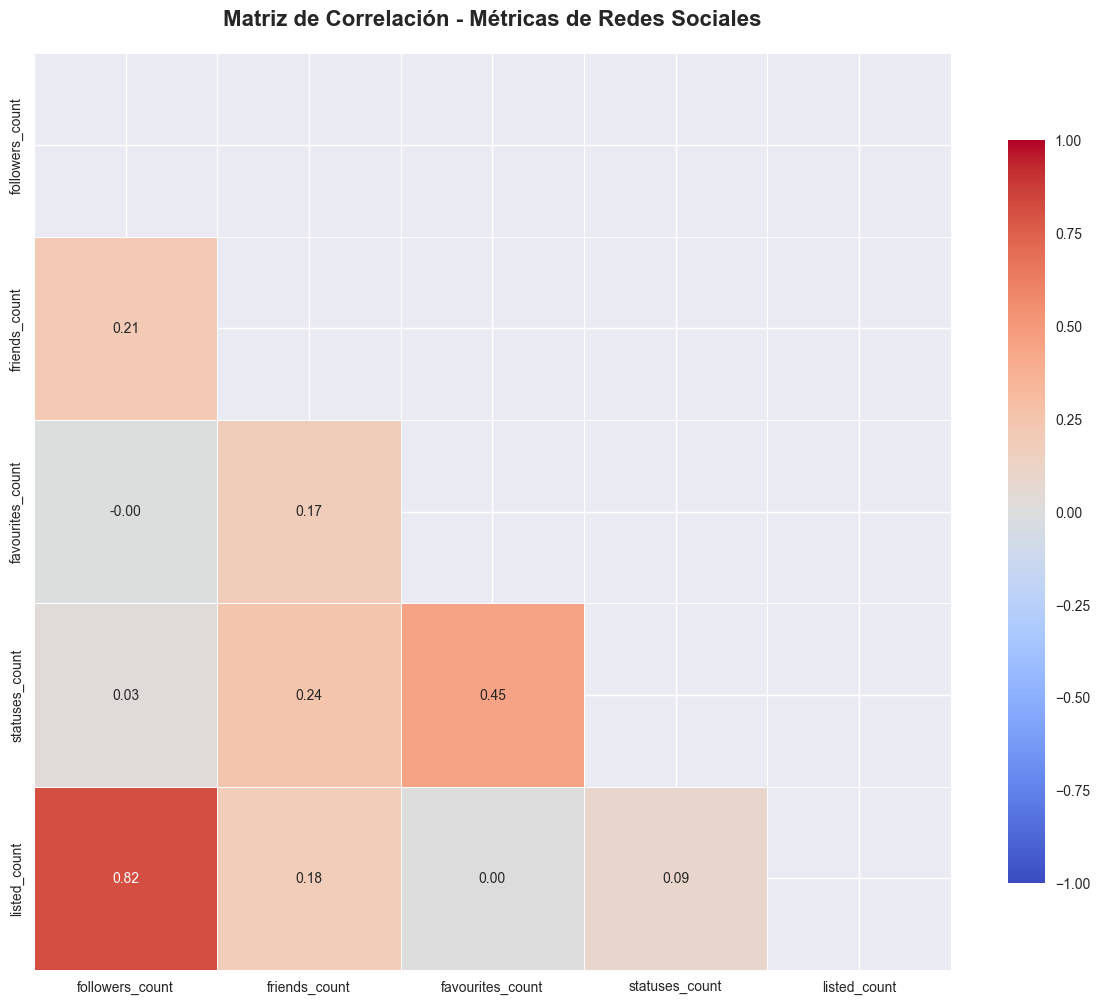

Top 10 Correlaciones Más Altas:
 1. followers_count ↔ listed_count: +0.815
 2. favourites_count ↔ statuses_count: +0.451
 3. friends_count ↔ statuses_count: +0.242
 4. followers_count ↔ friends_count: +0.207
 5. friends_count ↔ listed_count: +0.183
 6. friends_count ↔ favourites_count: +0.174
 7. statuses_count ↔ listed_count: +0.088
 8. followers_count ↔ statuses_count: +0.031
 9. favourites_count ↔ listed_count: +0.004
10. followers_count ↔ favourites_count: -0.002


In [10]:
# ANÁLISIS 6: Matriz de correlación de métricas sociales
if len(social_media_cols) > 1:
    # Calcular matriz de correlación
    corr_social = df_original[social_media_cols].corr()
    
    # Crear heatmap
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_social, dtype=bool))
    
    sns.heatmap(corr_social, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .8}, mask=mask,
                fmt='.2f', annot_kws={'fontsize': 10})
    
    plt.title('Matriz de Correlación - Métricas de Redes Sociales', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # Encontrar las correlaciones más altas
    print("Top 10 Correlaciones Más Altas:")
    # Obtener pares de correlaciones (excluyendo diagonal)
    corr_pairs = []
    for i in range(len(corr_social.columns)):
        for j in range(i+1, len(corr_social.columns)):
            corr_pairs.append((corr_social.columns[i], corr_social.columns[j], corr_social.iloc[i,j]))
    
    # Ordenar por correlación absoluta
    corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
    
    for i, (var1, var2, corr_val) in enumerate(corr_pairs[:10]):
        print(f"{i+1:2d}. {var1} ↔ {var2}: {corr_val:+.3f}")

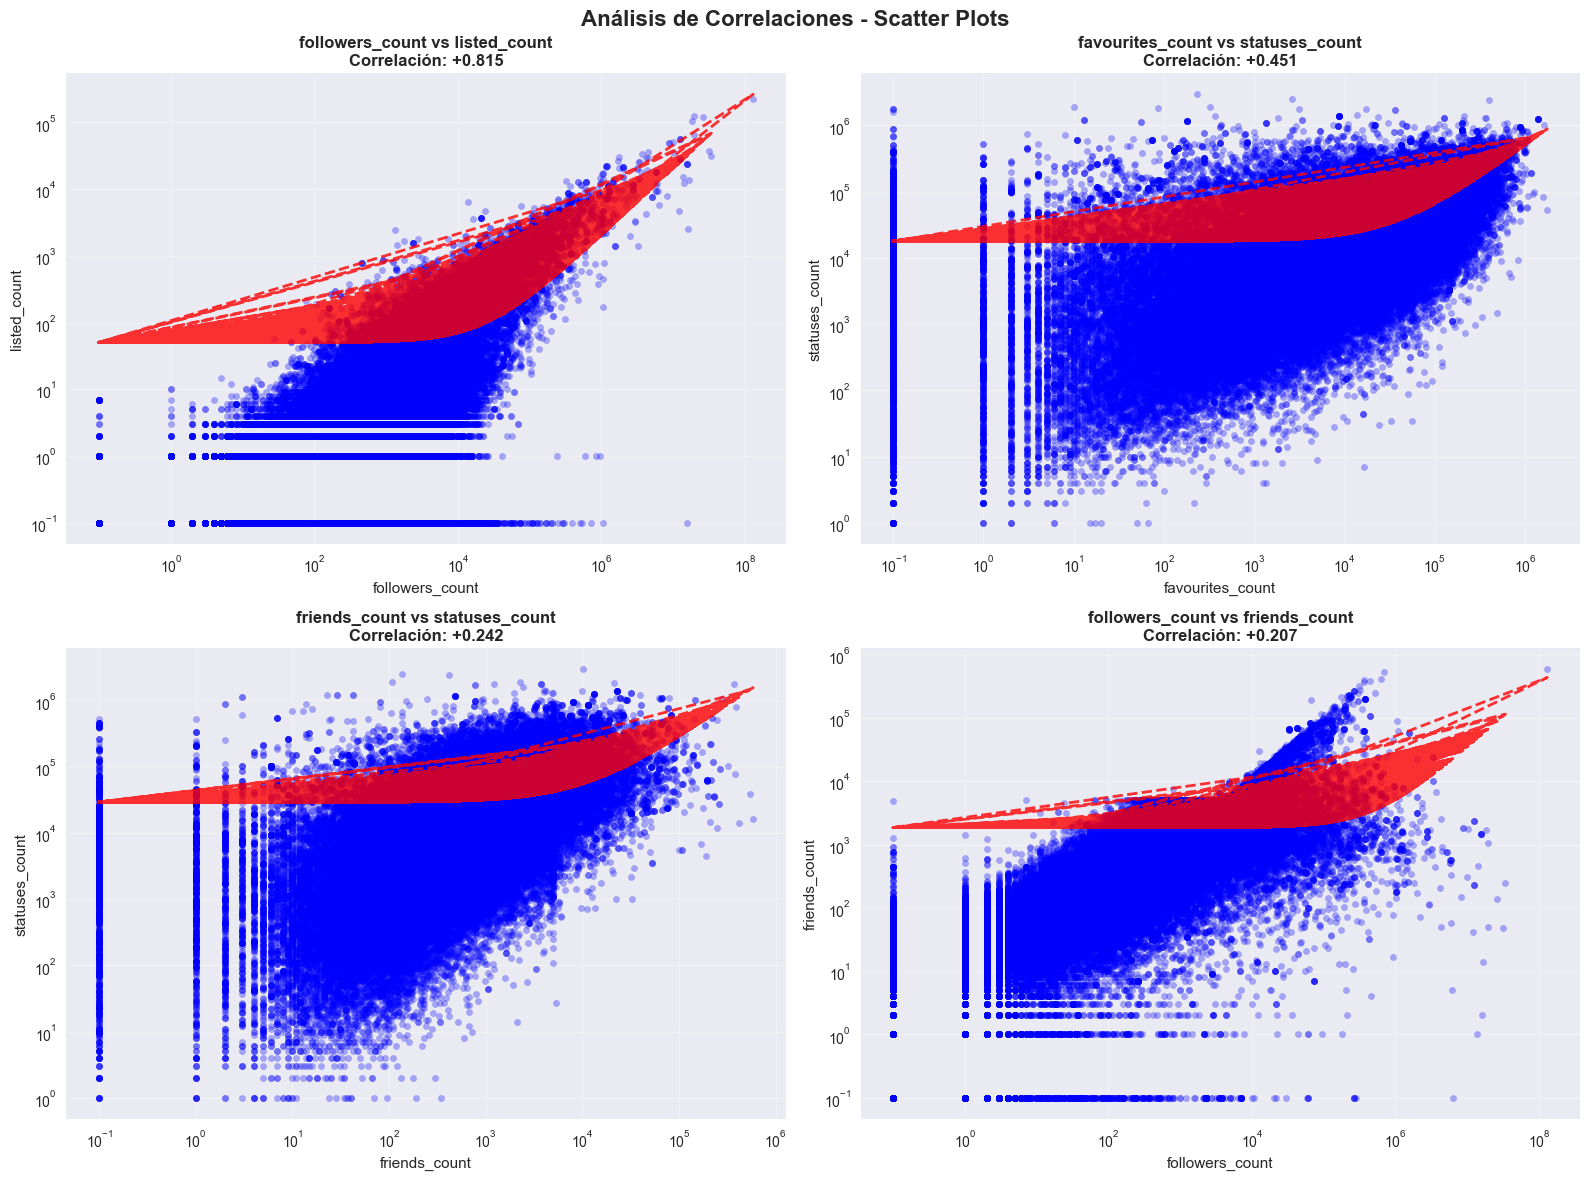

In [11]:
# ANÁLISIS 7: Scatter plots de las correlaciones más interesantes
if len(social_media_cols) >= 2:
    # Seleccionar pares con correlaciones más altas
    top_pairs = corr_pairs[:4]  # Top 4 correlaciones
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    for i, (var1, var2, corr_val) in enumerate(top_pairs[:4]):
        # Scatter plot
        x_data = df_original[var1].replace(0, 0.1)
        y_data = df_original[var2].replace(0, 0.1)
        
        axes[i].scatter(x_data, y_data, alpha=0.3, s=20, color='blue')
        
        # Línea de tendencia
        try:
            z = np.polyfit(x_data, y_data, 1)
            p = np.poly1d(z)
            axes[i].plot(x_data, p(x_data), "r--", alpha=0.8, linewidth=2)
        except:
            pass
        
        axes[i].set_xlabel(var1)
        axes[i].set_ylabel(var2)
        axes[i].set_title(f'{var1} vs {var2}\nCorrelación: {corr_val:+.3f}', fontweight='bold')
        
        # Usar escala log si hay valores muy dispersos
        if x_data.max() / x_data.min() > 1000:
            axes[i].set_xscale('log')
        if y_data.max() / y_data.min() > 1000:
            axes[i].set_yscale('log')
        
        axes[i].grid(True, alpha=0.3)
    
    plt.suptitle('Análisis de Correlaciones - Scatter Plots', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

## 4. Análisis de Balance de Clases y Target

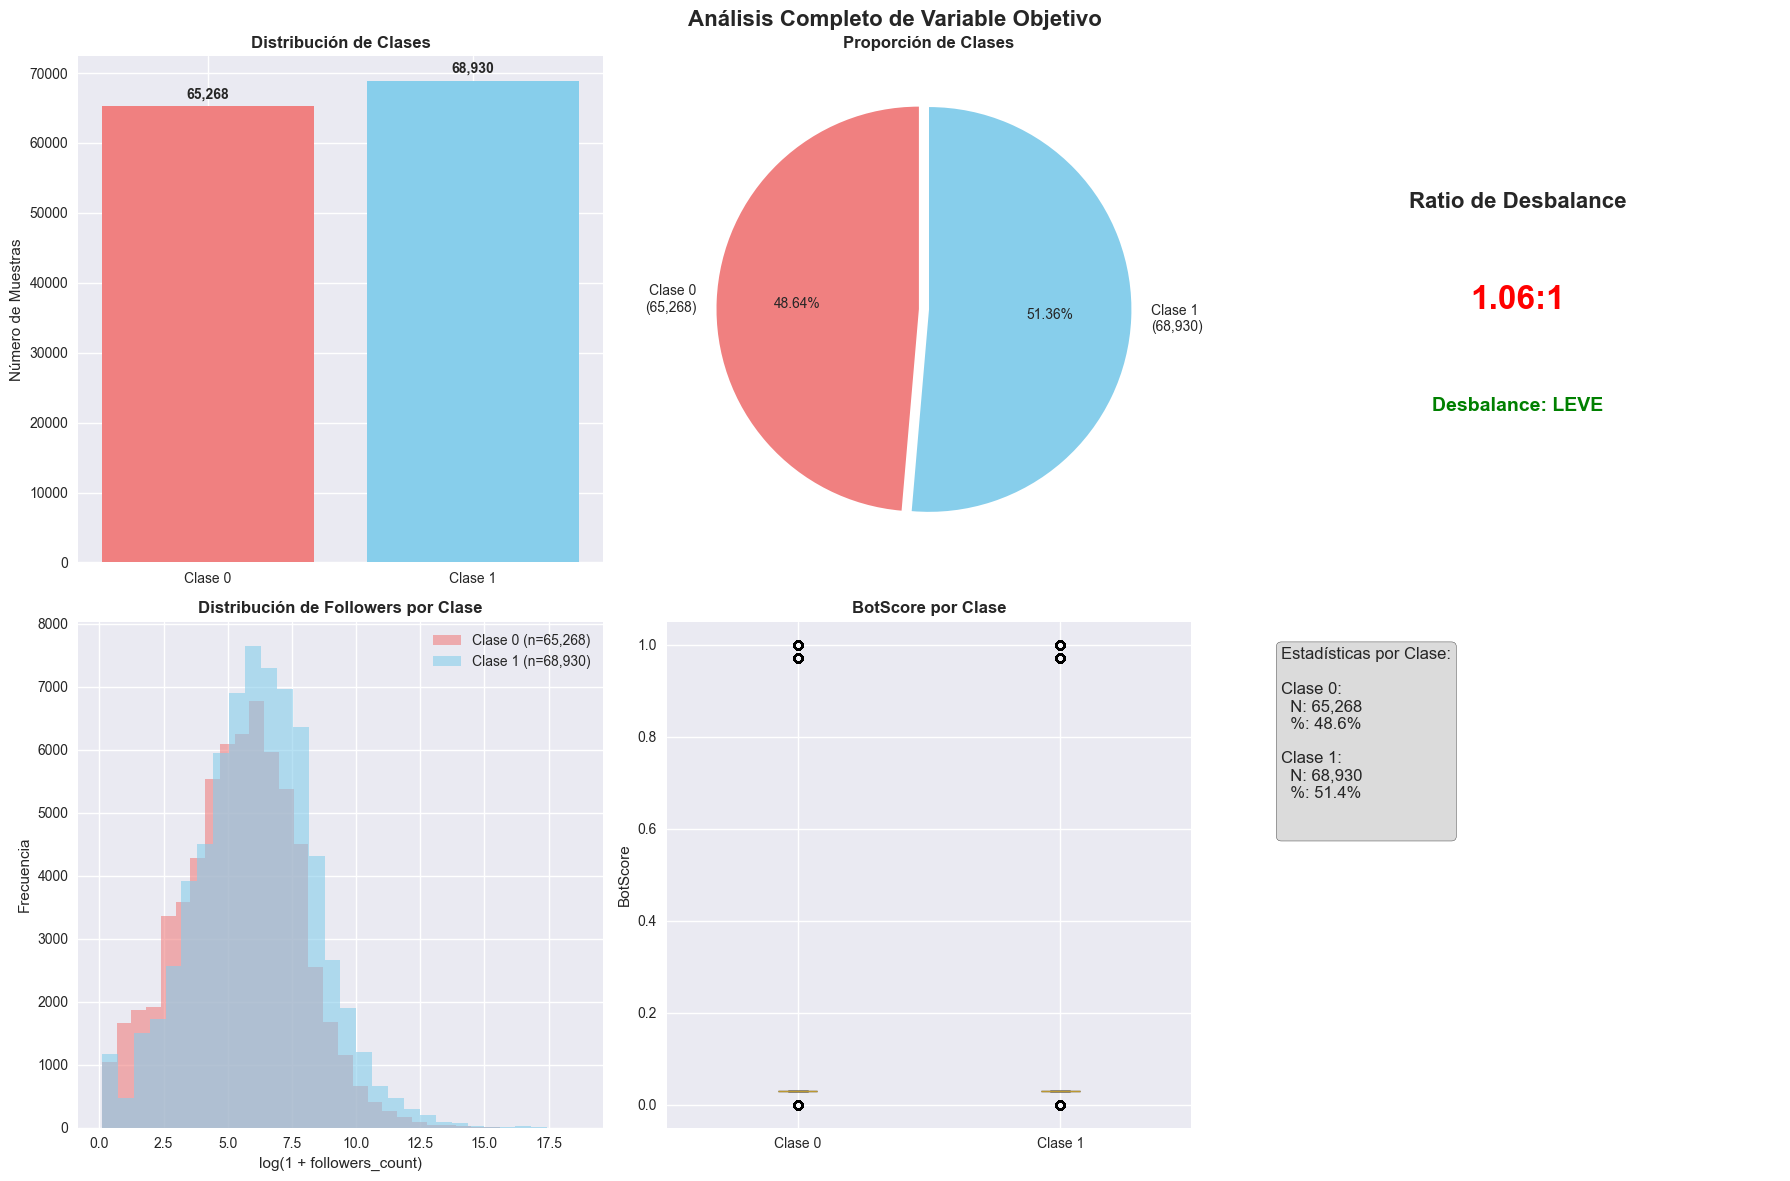

 Resumen del análisis de clases:
   - Total de muestras: 134,198
   - Clases encontradas: 2
   - Ratio de desbalance: 1.06:1
   - Nivel de desbalance: LEVE


In [12]:
# ANÁLISIS 8: Análisis completo de la variable objetivo
target_col = 'BinaryNumTarget'

if target_col in df_original.columns:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # 1. Distribución de clases - Bar plot
    class_counts = df_original[target_col].value_counts().sort_index()
    colors = ['lightcoral', 'skyblue']
    bars = axes[0,0].bar([f'Clase {int(k)}' for k in class_counts.index], class_counts.values, color=colors)
    axes[0,0].set_title('Distribución de Clases', fontweight='bold')
    axes[0,0].set_ylabel('Número de Muestras')
    
    # Agregar valores en las barras
    for bar, count in zip(bars, class_counts.values):
        height = bar.get_height()
        axes[0,0].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                      f'{count:,}', ha='center', va='bottom', fontweight='bold')
    
    # 2. Pie chart
    labels = [f'Clase {int(k)}\n({count:,})' for k, count in class_counts.items()]
    wedges, texts, autotexts = axes[0,1].pie(class_counts.values, labels=labels, autopct='%1.2f%%', 
                                            colors=colors, startangle=90, explode=(0.05, 0))
    axes[0,1].set_title('Proporción de Clases', fontweight='bold')
    
    # 3. Análisis de desbalance
    imbalance_ratio = class_counts.max() / class_counts.min()
    axes[0,2].text(0.5, 0.7, f'Ratio de Desbalance', fontsize=16, fontweight='bold', 
                  ha='center', transform=axes[0,2].transAxes)
    axes[0,2].text(0.5, 0.5, f'{imbalance_ratio:.2f}:1', fontsize=24, fontweight='bold', 
                  ha='center', transform=axes[0,2].transAxes, color='red')
    
    if imbalance_ratio > 5:
        severity = "SEVERO"
        color = 'red'
    elif imbalance_ratio > 3:
        severity = "MODERADO"
        color = 'orange'
    else:
        severity = "LEVE"
        color = 'green'
    
    axes[0,2].text(0.5, 0.3, f'Desbalance: {severity}', fontsize=14, fontweight='bold', 
                  ha='center', transform=axes[0,2].transAxes, color=color)
    axes[0,2].axis('off')
    
    # 4. Distribución de una métrica por clase (ejemplo: followers_count)
    if 'followers_count' in df_original.columns:
        for class_val in class_counts.index:
            class_data = df_original[df_original[target_col] == class_val]['followers_count']
            class_data_log = np.log1p(class_data.replace(0, 0.1))
            axes[1,0].hist(class_data_log, bins=30, alpha=0.6, 
                          label=f'Clase {int(class_val)} (n={len(class_data):,})',
                          color=colors[int(class_val)])
        
        axes[1,0].set_title('Distribución de Followers por Clase', fontweight='bold')
        axes[1,0].set_xlabel('log(1 + followers_count)')
        axes[1,0].set_ylabel('Frecuencia')
        axes[1,0].legend()
    
    # 5. Box plot de otra métrica por clase
    if 'BotScore' in df_original.columns:
        bot_by_class = [df_original[df_original[target_col] == class_val]['BotScore'] 
                       for class_val in class_counts.index]
        
        bp = axes[1,1].boxplot(bot_by_class, labels=[f'Clase {int(k)}' for k in class_counts.index], 
                              patch_artist=True)
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        axes[1,1].set_title('BotScore por Clase', fontweight='bold')
        axes[1,1].set_ylabel('BotScore')
    
    # 6. Estadísticas por clase
    stats_text = "Estadísticas por Clase:\n\n"
    for class_val in class_counts.index:
        class_data = df_original[df_original[target_col] == class_val]
        stats_text += f"Clase {int(class_val)}:\n"
        stats_text += f"  N: {len(class_data):,}\n"
        stats_text += f"  %: {len(class_data)/len(df_original)*100:.1f}%\n\n"
    
    axes[1,2].text(0.05, 0.95, stats_text, transform=axes[1,2].transAxes, 
                  verticalalignment='top', fontsize=12,
                  bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
    axes[1,2].axis('off')
    
    plt.suptitle('Análisis Completo de Variable Objetivo', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print(f" Resumen del análisis de clases:")
    print(f"   - Total de muestras: {len(df_original):,}")
    print(f"   - Clases encontradas: {len(class_counts)}")
    print(f"   - Ratio de desbalance: {imbalance_ratio:.2f}:1")
    print(f"   - Nivel de desbalance: {severity}")

## 5. Análisis de Outliers Avanzado

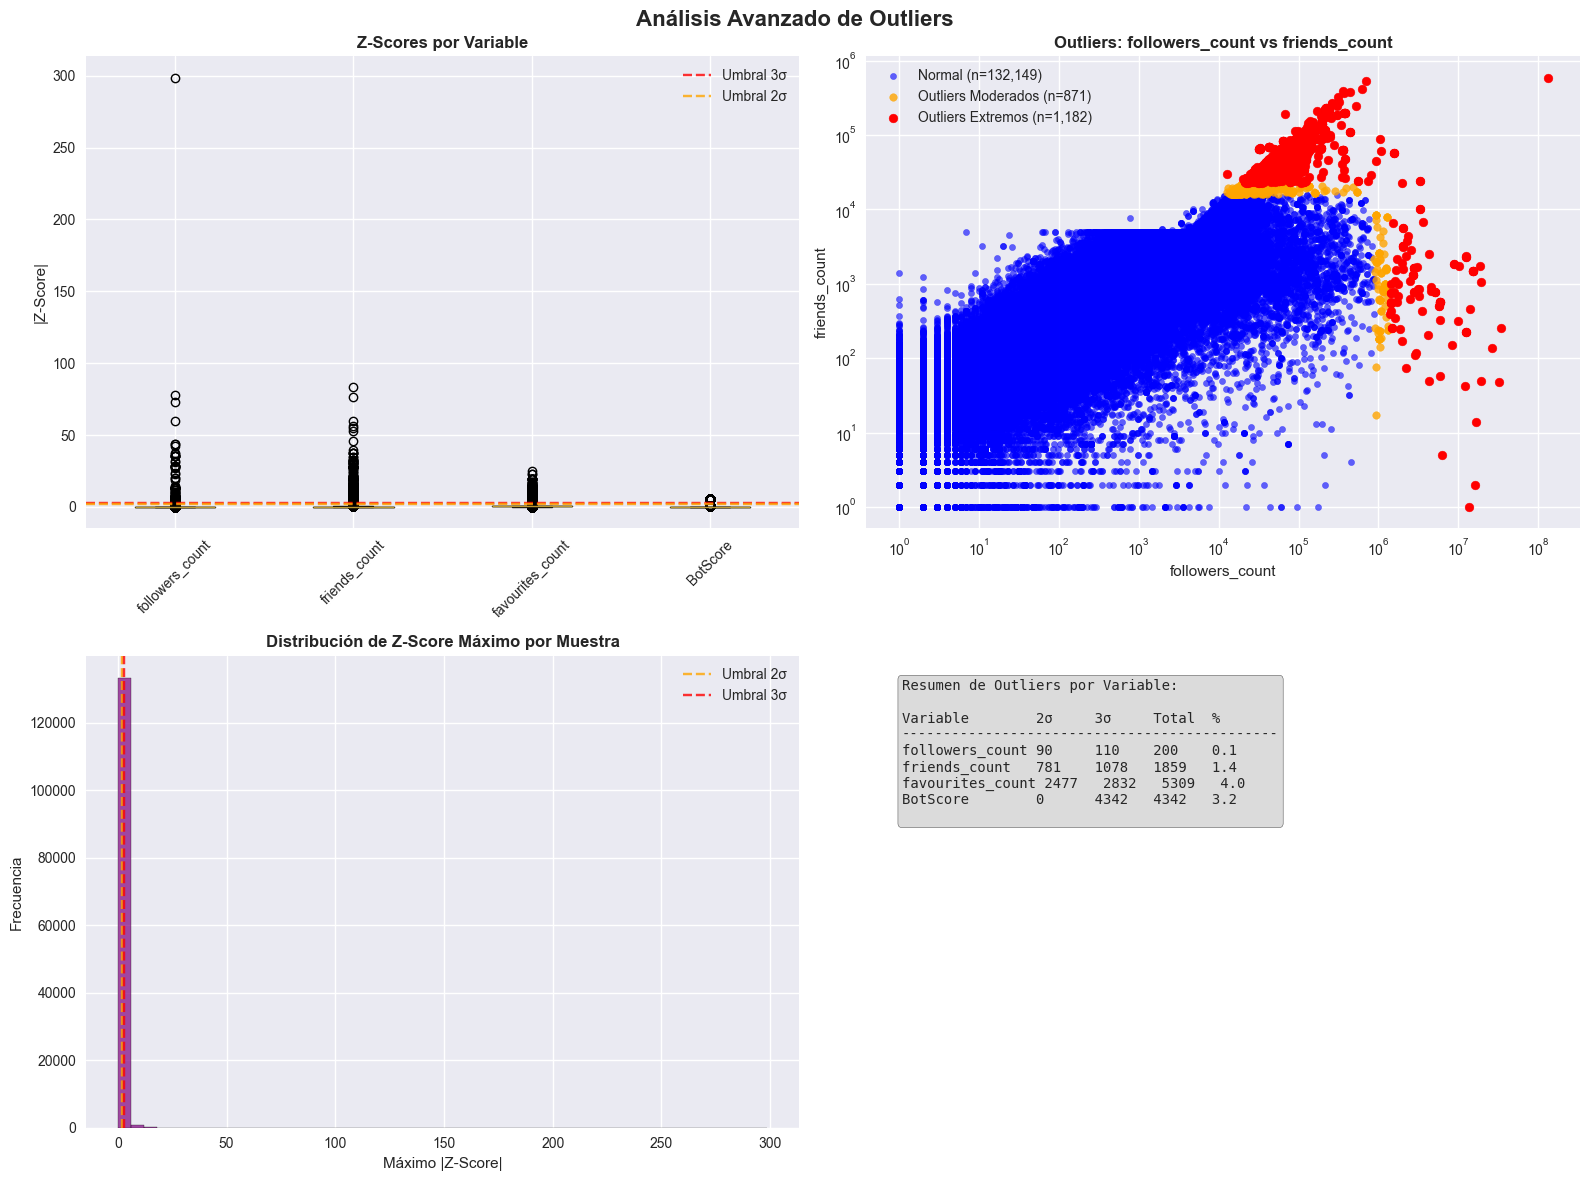


Resumen de outliers:
   - Outliers extremos (>3σ): 8,362
   - Outliers moderados (2-3σ): 3,348
   - Porcentaje total de muestras con outliers: 8.7%


In [13]:
# ANÁLISIS 9: Detección de outliers multivariado
# Seleccionar variables numéricas clave para análisis de outliers
key_vars = ['followers_count', 'friends_count', 'favourites_count', 'BotScore']
available_vars = [var for var in key_vars if var in df_original.columns]

if len(available_vars) >= 2:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    # 1. Z-score analysis
    z_scores_data = []
    for var in available_vars[:4]:
        z_scores = np.abs(zscore(df_original[var], nan_policy='omit'))
        z_scores_data.append(z_scores)
    
    axes[0].boxplot(z_scores_data, labels=available_vars[:4])
    axes[0].axhline(y=3, color='red', linestyle='--', alpha=0.8, label='Umbral 3σ')
    axes[0].axhline(y=2, color='orange', linestyle='--', alpha=0.8, label='Umbral 2σ')
    axes[0].set_title('Z-Scores por Variable', fontweight='bold')
    axes[0].set_ylabel('|Z-Score|')
    axes[0].legend()
    axes[0].tick_params(axis='x', rotation=45)
    
    # 2. Scatter plot con outliers marcados
    if len(available_vars) >= 2:
        x_var, y_var = available_vars[0], available_vars[1]
        x_data = df_original[x_var]
        y_data = df_original[y_var]
        
        # Calcular outliers
        x_z = np.abs(zscore(x_data, nan_policy='omit'))
        y_z = np.abs(zscore(y_data, nan_policy='omit'))
        
        # Clasificar puntos
        normal = (x_z < 2) & (y_z < 2)
        moderate_outliers = ((x_z >= 2) & (x_z < 3)) | ((y_z >= 2) & (y_z < 3))
        extreme_outliers = (x_z >= 3) | (y_z >= 3)
        
        # Plot
        axes[1].scatter(x_data[normal], y_data[normal], alpha=0.6, s=20, 
                       color='blue', label=f'Normal (n={normal.sum():,})')
        axes[1].scatter(x_data[moderate_outliers], y_data[moderate_outliers], 
                       alpha=0.8, s=30, color='orange', 
                       label=f'Outliers Moderados (n={moderate_outliers.sum():,})')
        axes[1].scatter(x_data[extreme_outliers], y_data[extreme_outliers], 
                       alpha=1.0, s=40, color='red', 
                       label=f'Outliers Extremos (n={extreme_outliers.sum():,})')
        
        axes[1].set_xlabel(x_var)
        axes[1].set_ylabel(y_var)
        axes[1].set_title(f'Outliers: {x_var} vs {y_var}', fontweight='bold')
        axes[1].legend()
        axes[1].set_xscale('log')
        axes[1].set_yscale('log')
    
    # 3. Distribución de máximos Z-scores por muestra
    max_z_scores = np.max(z_scores_data, axis=0)
    axes[2].hist(max_z_scores, bins=50, alpha=0.7, color='purple', edgecolor='black')
    axes[2].axvline(x=2, color='orange', linestyle='--', alpha=0.8, label='Umbral 2σ')
    axes[2].axvline(x=3, color='red', linestyle='--', alpha=0.8, label='Umbral 3σ')
    axes[2].set_title('Distribución de Z-Score Máximo por Muestra', fontweight='bold')
    axes[2].set_xlabel('Máximo |Z-Score|')
    axes[2].set_ylabel('Frecuencia')
    axes[2].legend()
    
    # 4. Resumen estadístico de outliers
    outlier_summary = []
    for var in available_vars:
        z_scores = np.abs(zscore(df_original[var], nan_policy='omit'))
        moderate = ((z_scores >= 2) & (z_scores < 3)).sum()
        extreme = (z_scores >= 3).sum()
        outlier_summary.append({
            'Variable': var,
            'Moderados_2σ': moderate,
            'Extremos_3σ': extreme,
            'Total_Outliers': moderate + extreme,
            'Pct_Outliers': (moderate + extreme) / len(df_original) * 100
        })
    
    outlier_df = pd.DataFrame(outlier_summary)
    
    # Tabla como texto
    table_text = "Resumen de Outliers por Variable:\n\n"
    table_text += f"{'Variable':<15} {'2σ':<6} {'3σ':<6} {'Total':<6} {'%':<6}\n"
    table_text += "-"*45 + "\n"
    for _, row in outlier_df.iterrows():
        table_text += f"{row['Variable']:<15} {row['Moderados_2σ']:<6} {row['Extremos_3σ']:<6} {row['Total_Outliers']:<6} {row['Pct_Outliers']:<6.1f}\n"
    
    axes[3].text(0.05, 0.95, table_text, transform=axes[3].transAxes, 
                verticalalignment='top', fontfamily='monospace', fontsize=10,
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
    axes[3].axis('off')
    
    plt.suptitle('Análisis Avanzado de Outliers', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print("\nResumen de outliers:")
    total_extreme = outlier_df['Extremos_3σ'].sum()
    total_moderate = outlier_df['Moderados_2σ'].sum()
    print(f"   - Outliers extremos (>3σ): {total_extreme:,}")
    print(f"   - Outliers moderados (2-3σ): {total_moderate:,}")
    print(f"   - Porcentaje total de muestras con outliers: {(total_extreme + total_moderate)/len(df_original)*100:.1f}%")

## 6. Análisis de Entidades y Características NLP

Encontradas 18 tipos de entidades nombradas


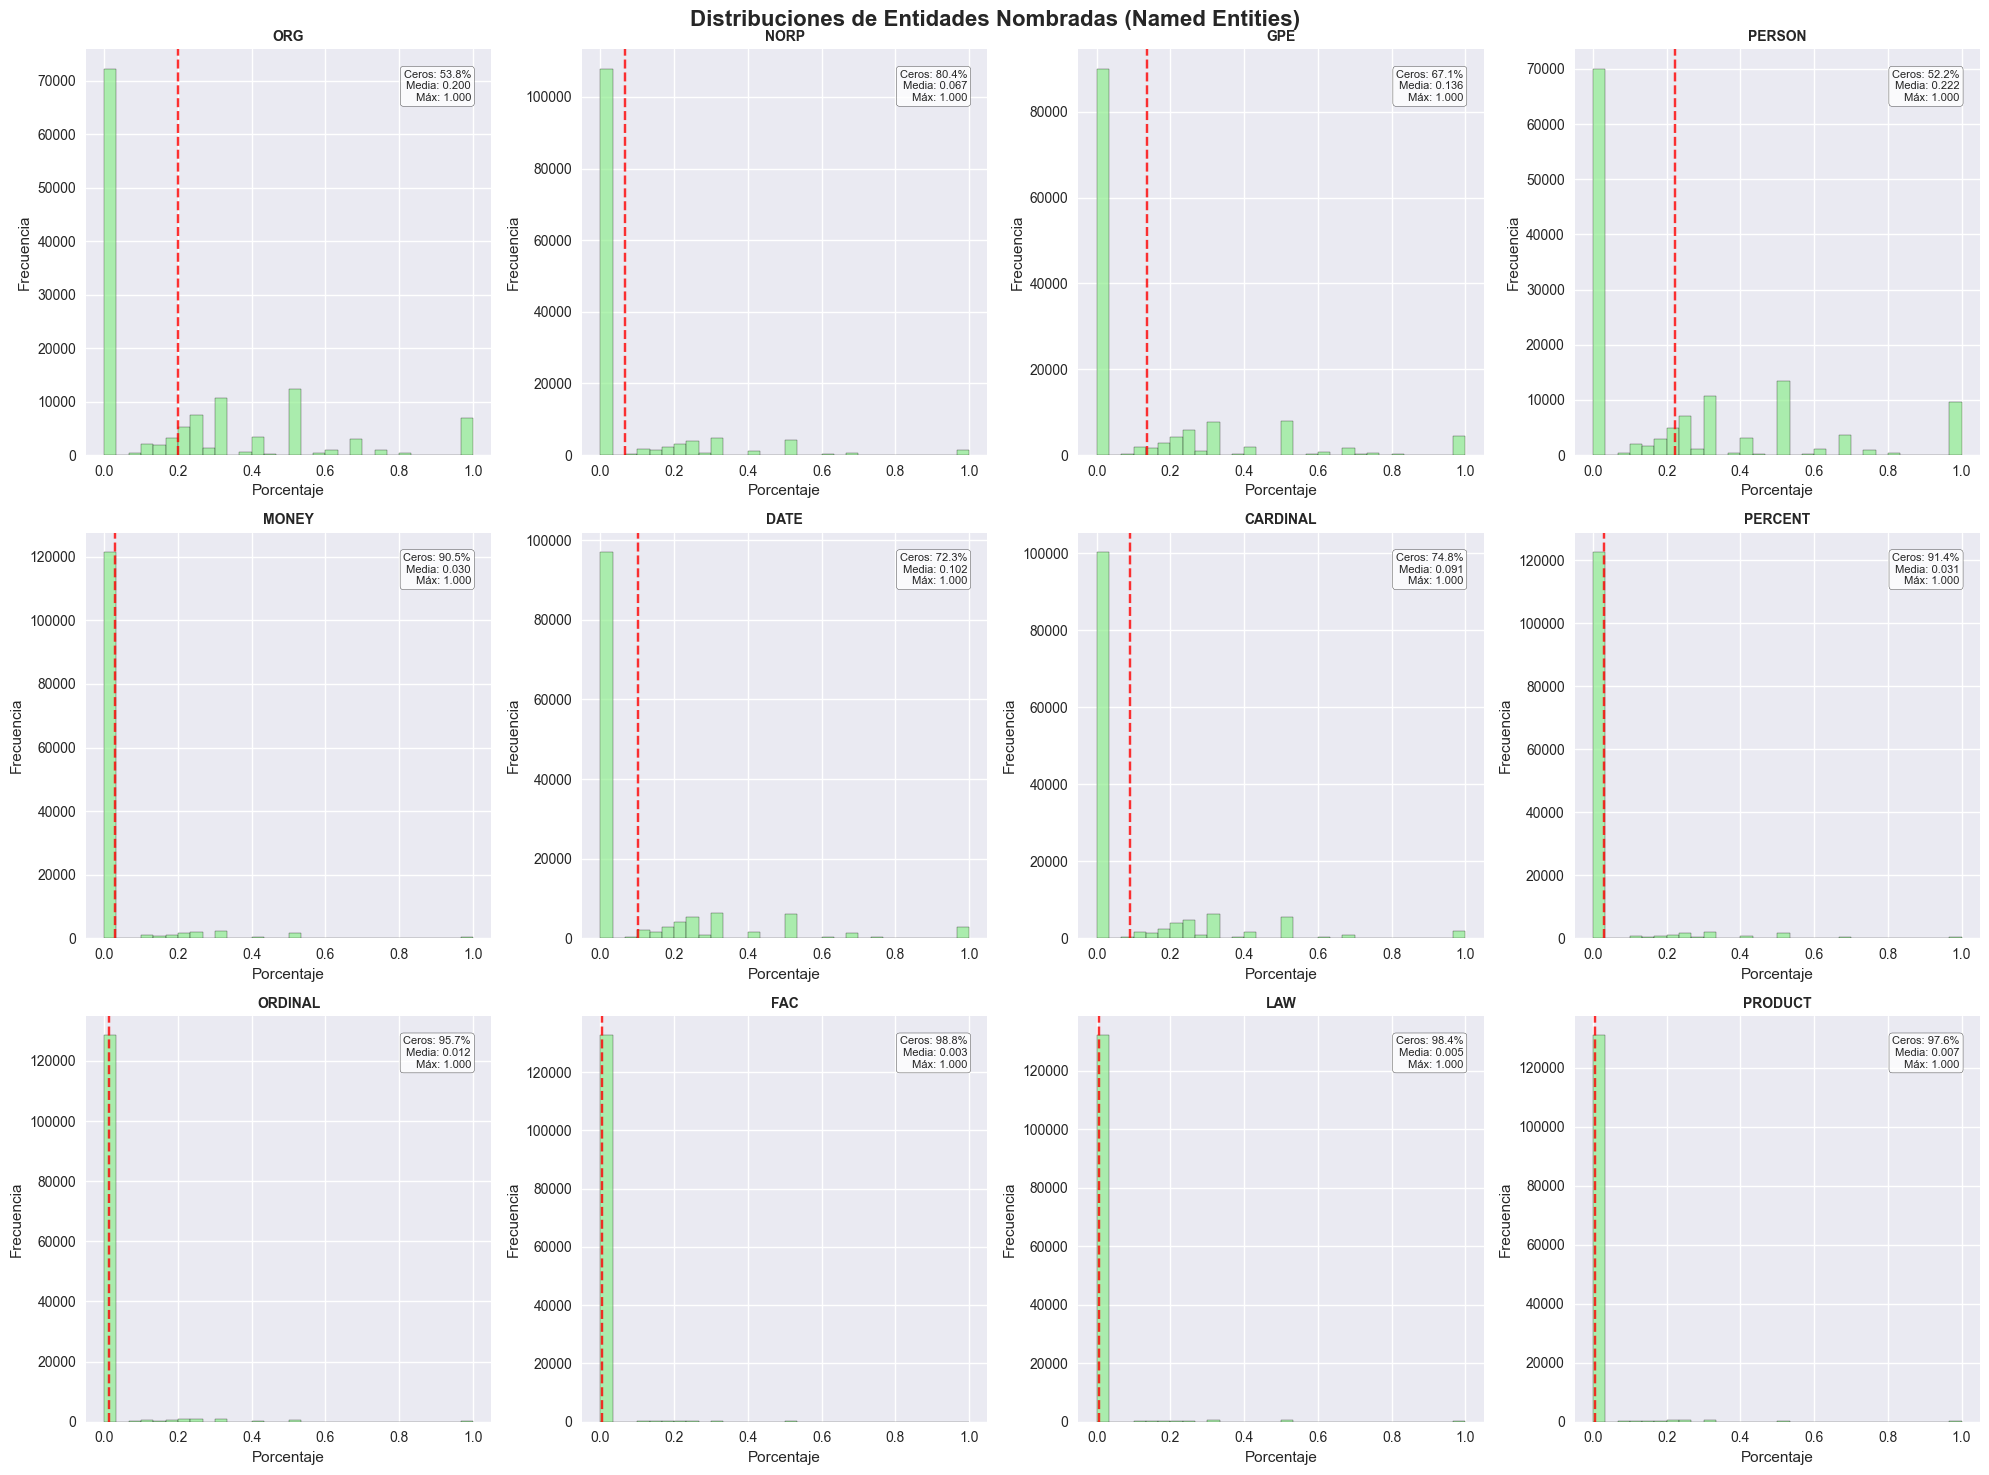


Top 10 Entidades Más Presentes:
 1. PERSON         :  47.8% presencia, media=0.222
 2. ORG            :  46.2% presencia, media=0.200
 3. GPE            :  32.9% presencia, media=0.136
 4. DATE           :  27.7% presencia, media=0.102
 5. CARDINAL       :  25.2% presencia, media=0.091
 6. NORP           :  19.6% presencia, media=0.067
 7. MONEY          :   9.5% presencia, media=0.030
 8. PERCENT        :   8.6% presencia, media=0.031
 9. ORDINAL        :   4.3% presencia, media=0.012
10. PRODUCT        :   2.4% presencia, media=0.007


In [14]:
# ANÁLISIS 10: Análisis de entidades nombradas
entity_cols = [col for col in df_original.columns if '_percentage' in col]

if entity_cols:
    print(f"Encontradas {len(entity_cols)} tipos de entidades nombradas")
    
    # Seleccionar las más relevantes para visualización
    top_entity_cols = entity_cols[:12]  # Top 12 para visualizar
    
    fig, axes = plt.subplots(3, 4, figsize=(20, 15))
    axes = axes.flatten()
    
    entity_stats = []
    
    for i, col in enumerate(top_entity_cols):
        data = df_original[col]
        
        # Histograma
        axes[i].hist(data, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
        axes[i].set_title(f'{col.replace("_percentage", "")}', fontweight='bold', fontsize=10)
        axes[i].set_xlabel('Porcentaje')
        axes[i].set_ylabel('Frecuencia')
        
        # Estadísticas
        zero_pct = (data == 0).sum() / len(data) * 100
        mean_val = data.mean()
        max_val = data.max()
        
        # Texto informativo
        info_text = f'Ceros: {zero_pct:.1f}%\nMedia: {mean_val:.3f}\nMáx: {max_val:.3f}'
        axes[i].text(0.95, 0.95, info_text, transform=axes[i].transAxes, 
                    verticalalignment='top', horizontalalignment='right', fontsize=8,
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # Guardar estadísticas
        entity_stats.append({
            'Entidad': col.replace('_percentage', ''),
            'Media': mean_val,
            'Ceros_%': zero_pct,
            'Max': max_val,
            'Presencia_%': 100 - zero_pct
        })
        
        if mean_val > 0:
            axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.8)
    
    plt.suptitle('Distribuciones de Entidades Nombradas (Named Entities)', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Crear resumen de entidades más presentes
    entity_df = pd.DataFrame(entity_stats)
    entity_df = entity_df.sort_values('Presencia_%', ascending=False)
    
    print("\nTop 10 Entidades Más Presentes:")
    for i, (_, row) in enumerate(entity_df.head(10).iterrows()):
        print(f"{i+1:2d}. {row['Entidad']:<15}: {row['Presencia_%']:5.1f}% presencia, media={row['Media']:.3f}")

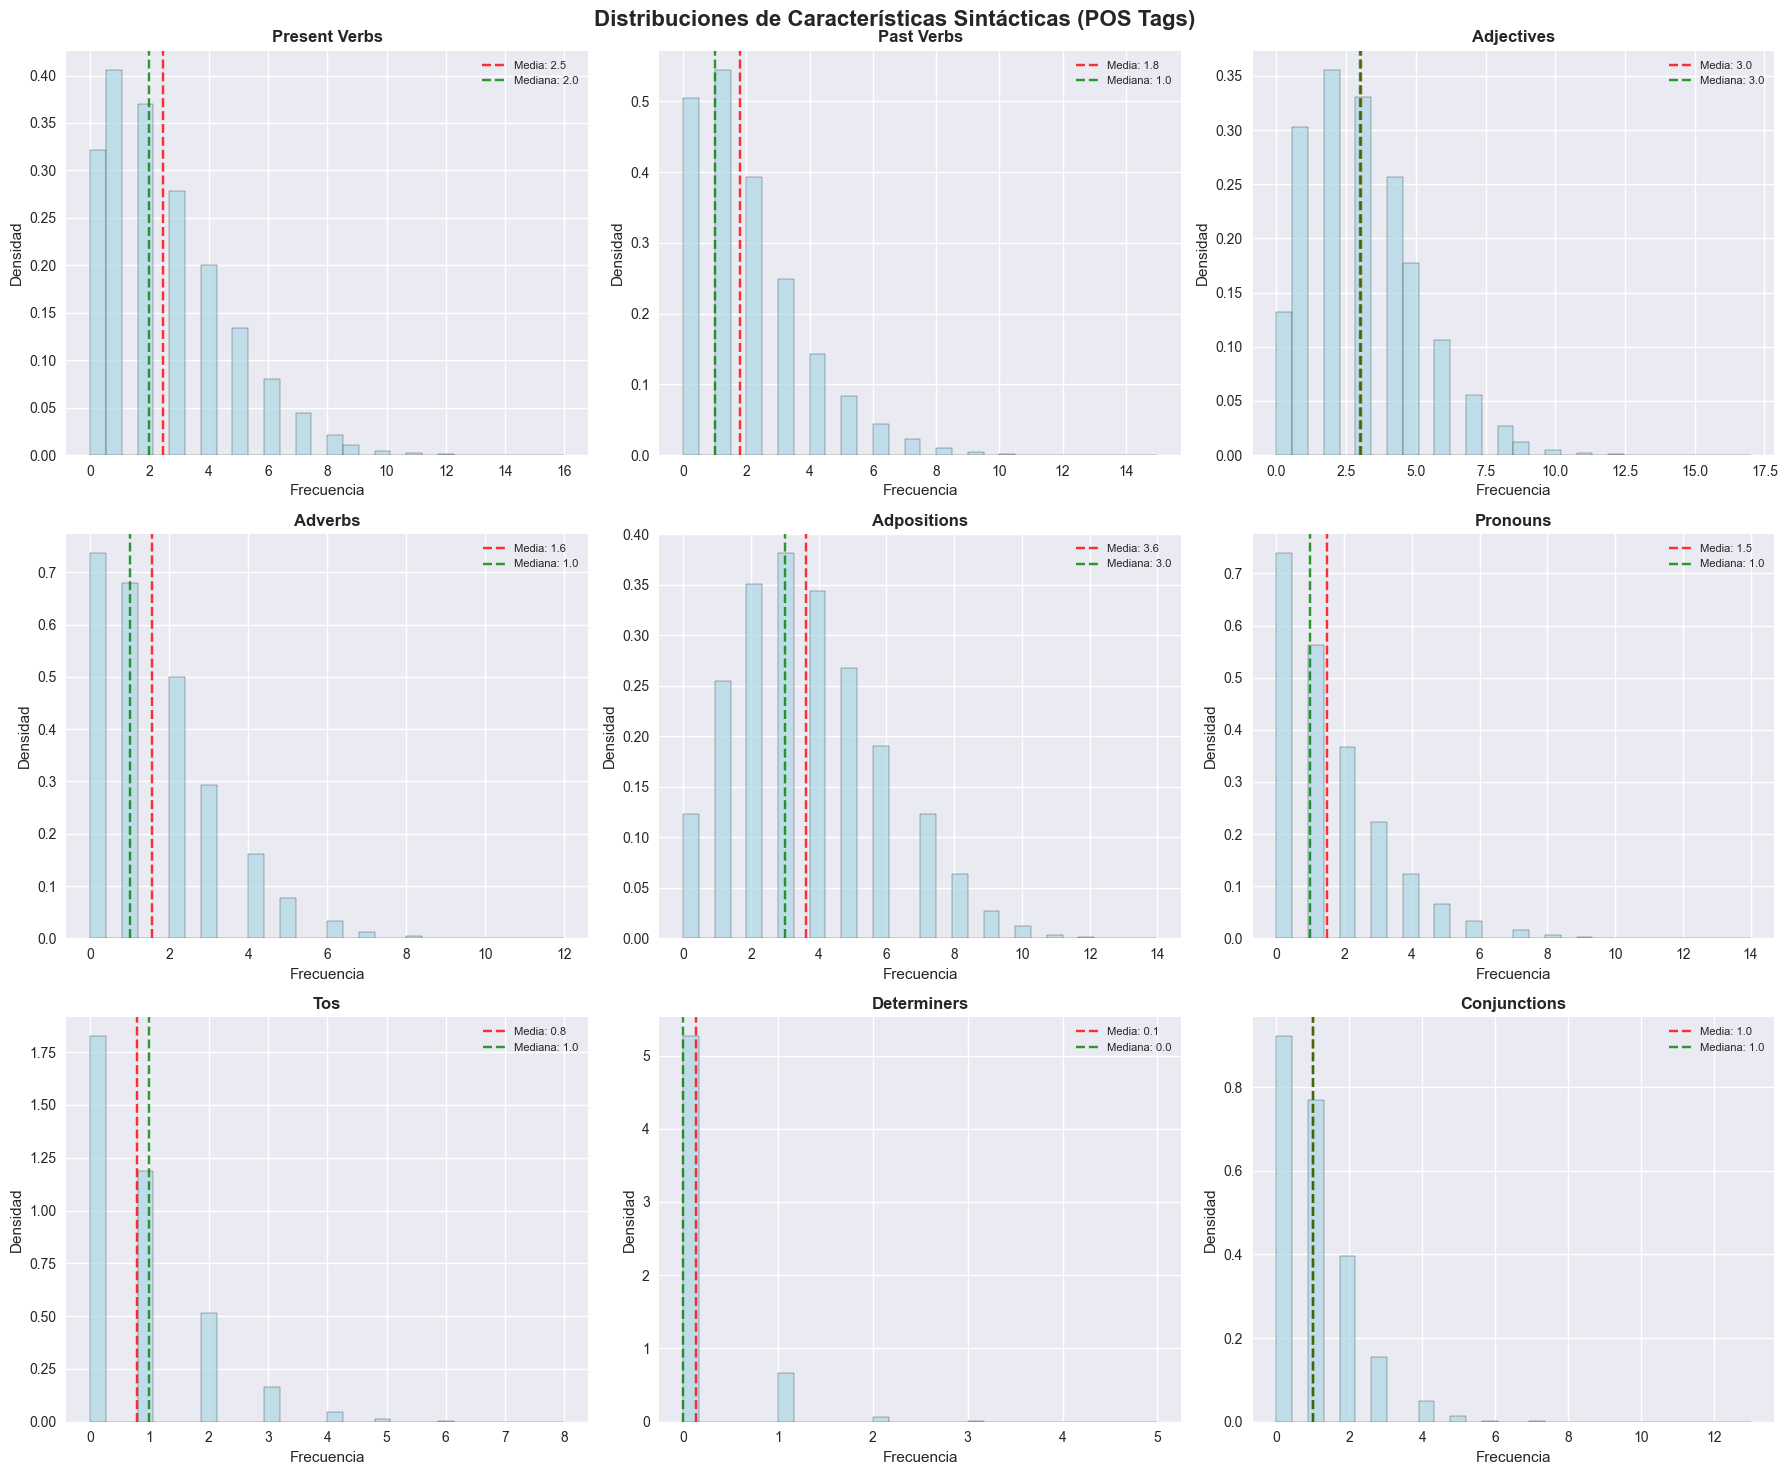

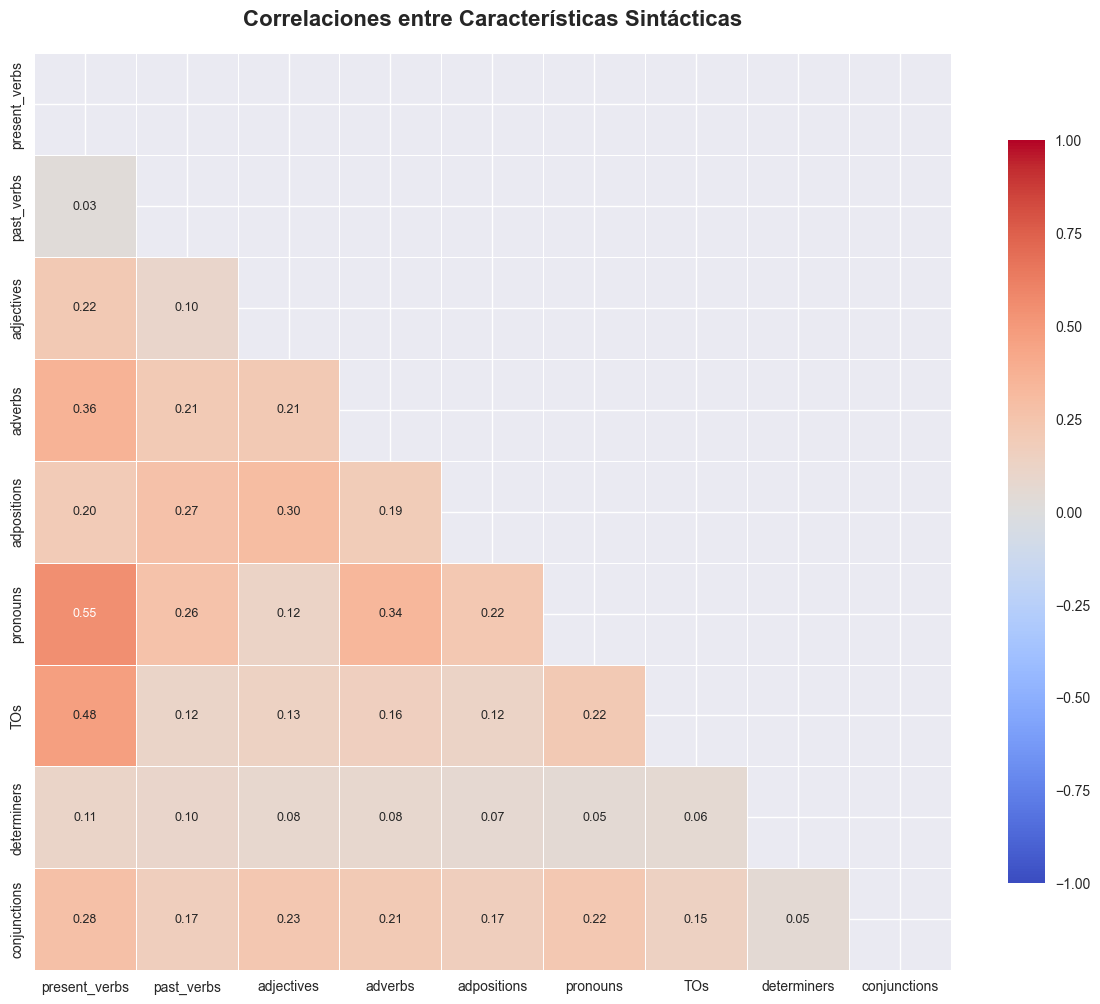

In [15]:
# ANÁLISIS 11: Características sintácticas (POS tags)
pos_cols = ['present_verbs', 'past_verbs', 'adjectives', 'adverbs', 'adpositions', 
           'pronouns', 'TOs', 'determiners', 'conjunctions']
available_pos_cols = [col for col in pos_cols if col in df_original.columns]

if available_pos_cols:
    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    axes = axes.flatten()
    
    pos_stats = []
    
    for i, col in enumerate(available_pos_cols[:9]):
        data = df_original[col]
        
        # Histograma con curva de densidad
        axes[i].hist(data, bins=30, alpha=0.7, color='lightblue', edgecolor='black', density=True)
        
        # Estadísticas
        mean_val = data.mean()
        median_val = data.median()
        std_val = data.std()
        
        axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Media: {mean_val:.1f}')
        axes[i].axvline(median_val, color='green', linestyle='--', alpha=0.8, label=f'Mediana: {median_val:.1f}')
        
        axes[i].set_title(col.replace('_', ' ').title(), fontweight='bold')
        axes[i].set_xlabel('Frecuencia')
        axes[i].set_ylabel('Densidad')
        axes[i].legend(fontsize=8)
        
        # Guardar estadísticas
        pos_stats.append({
            'POS_Tag': col,
            'Media': mean_val,
            'Mediana': median_val,
            'Std': std_val,
            'CV': std_val/mean_val if mean_val > 0 else 0
        })
    
    # Ocultar ejes vacíos
    for i in range(len(available_pos_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.suptitle('Distribuciones de Características Sintácticas (POS Tags)', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Crear heatmap de correlación entre POS tags
    if len(available_pos_cols) > 1:
        pos_corr = df_original[available_pos_cols].corr()
        
        plt.figure(figsize=(12, 10))
        mask = np.triu(np.ones_like(pos_corr, dtype=bool))
        sns.heatmap(pos_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
                    square=True, linewidths=0.5, cbar_kws={"shrink": .8}, mask=mask,
                    fmt='.2f', annot_kws={'fontsize': 9})
        plt.title('Correlaciones entre Características Sintácticas', fontsize=16, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()

## 7. Análisis Multivariado y Reducción Dimensional

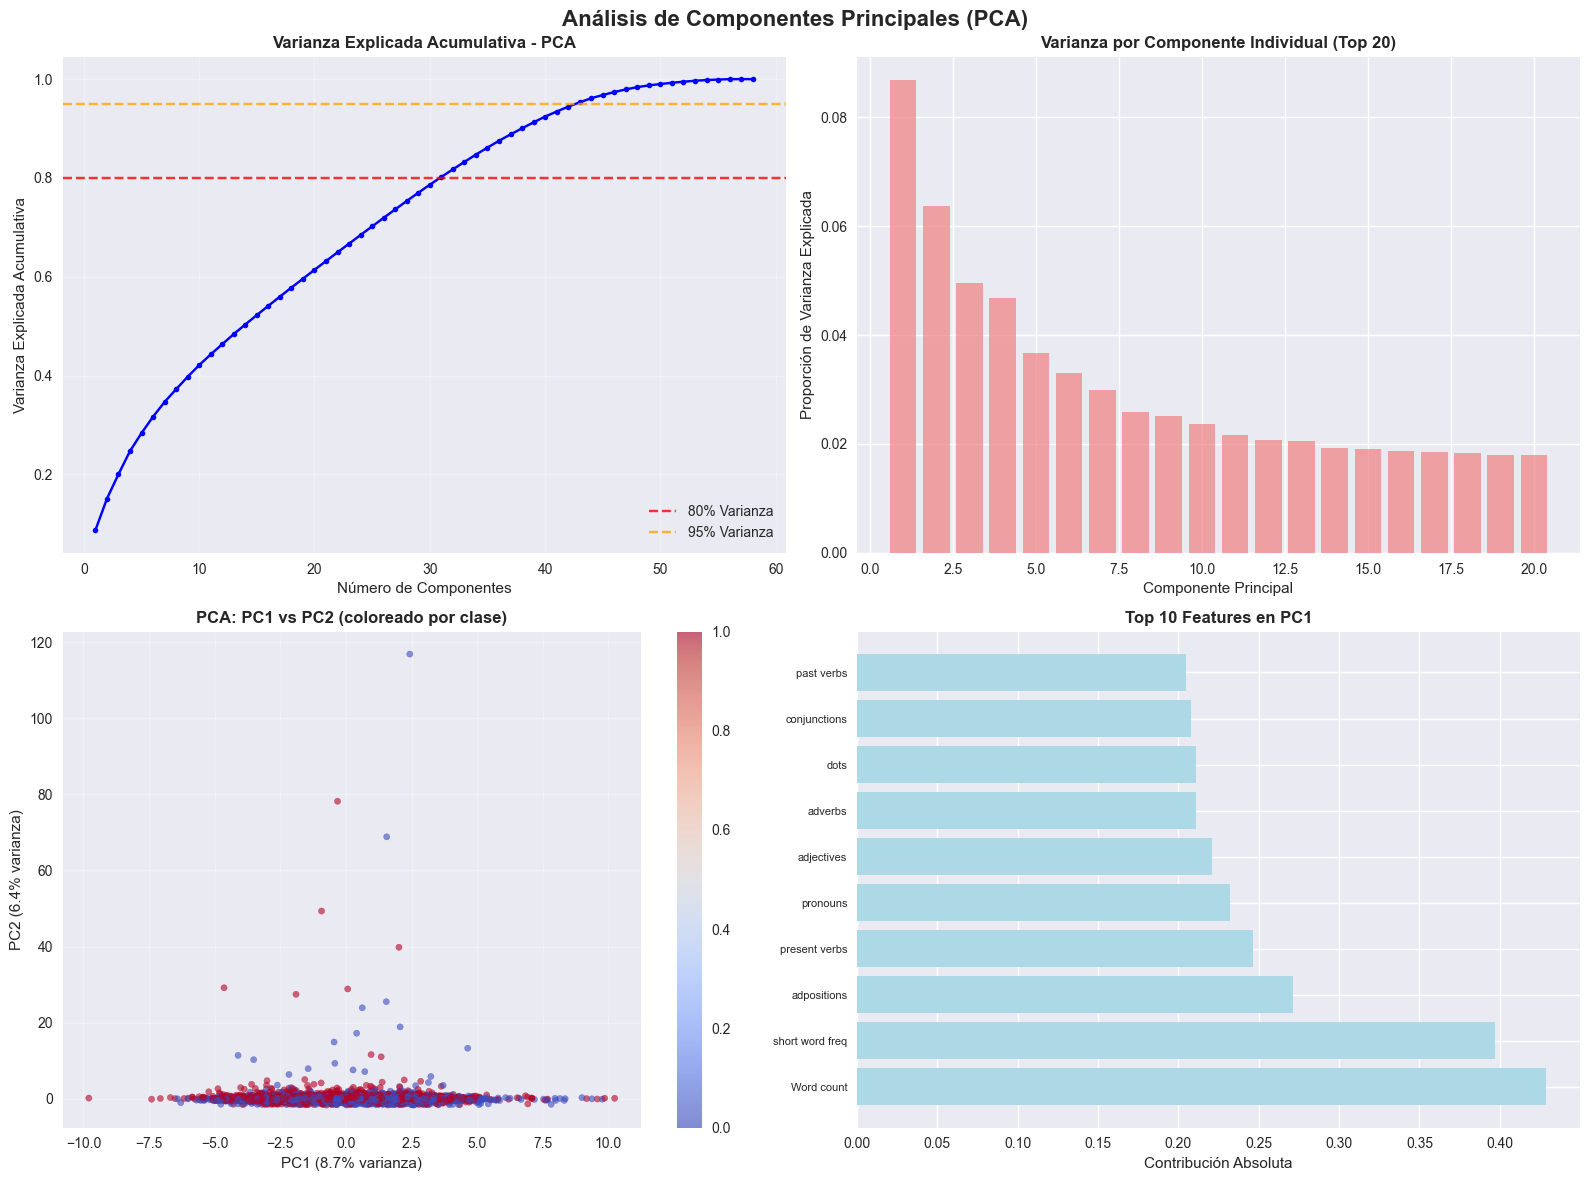


Resumen PCA:
   - Componentes para 80% varianza: 31
   - Componentes para 95% varianza: 43
   - Varianza PC1: 8.7%
   - Varianza PC2: 6.4%
   - Varianza PC1+PC2: 15.1%


In [16]:
# ANÁLISIS 12: PCA para análisis de componentes principales
# Preparar datos para PCA (solo variables numéricas, excluyendo target)
numeric_features = df_original.select_dtypes(include=[np.number]).columns.tolist()
if 'BinaryNumTarget' in numeric_features:
    numeric_features.remove('BinaryNumTarget')
if 'Unnamed: 0' in numeric_features:
    numeric_features.remove('Unnamed: 0')

# Tomar una muestra para análisis más rápido
sample_size = min(10000, len(df_original))
df_sample = df_original.sample(n=sample_size, random_state=42)

# Preparar datos para PCA
X = df_sample[numeric_features].fillna(0)
y = df_sample['BinaryNumTarget'] if 'BinaryNumTarget' in df_sample.columns else None

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Crear visualizaciones de PCA
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Varianza explicada acumulativa
cumsum_var = np.cumsum(pca.explained_variance_ratio_)
axes[0,0].plot(range(1, len(cumsum_var)+1), cumsum_var, 'bo-', markersize=4)
axes[0,0].axhline(y=0.8, color='red', linestyle='--', alpha=0.8, label='80% Varianza')
axes[0,0].axhline(y=0.95, color='orange', linestyle='--', alpha=0.8, label='95% Varianza')
axes[0,0].set_title('Varianza Explicada Acumulativa - PCA', fontweight='bold')
axes[0,0].set_xlabel('Número de Componentes')
axes[0,0].set_ylabel('Varianza Explicada Acumulativa')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Varianza por componente individual
axes[0,1].bar(range(1, 21), pca.explained_variance_ratio_[:20], alpha=0.7, color='lightcoral')
axes[0,1].set_title('Varianza por Componente Individual (Top 20)', fontweight='bold')
axes[0,1].set_xlabel('Componente Principal')
axes[0,1].set_ylabel('Proporción de Varianza Explicada')

# 3. Scatter plot de primeras dos componentes principales
if y is not None:
    # Colorear por clase
    scatter = axes[1,0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.6, s=20, cmap='coolwarm')
    axes[1,0].set_title('PCA: PC1 vs PC2 (coloreado por clase)', fontweight='bold')
    plt.colorbar(scatter, ax=axes[1,0])
else:
    axes[1,0].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, s=20, color='blue')
    axes[1,0].set_title('PCA: PC1 vs PC2', fontweight='bold')

axes[1,0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} varianza)')
axes[1,0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} varianza)')
axes[1,0].grid(True, alpha=0.3)

# 4. Top features en PC1 y PC2
# Obtener las características más importantes en PC1
pc1_features = np.abs(pca.components_[0])
pc1_top_idx = np.argsort(pc1_features)[-10:][::-1]
pc1_top_features = [numeric_features[i] for i in pc1_top_idx]
pc1_top_values = pc1_features[pc1_top_idx]

axes[1,1].barh(range(10), pc1_top_values, color='lightblue')
axes[1,1].set_yticks(range(10))
axes[1,1].set_yticklabels([f.replace('_', ' ')[:20] for f in pc1_top_features], fontsize=8)
axes[1,1].set_title('Top 10 Features en PC1', fontweight='bold')
axes[1,1].set_xlabel('Contribución Absoluta')

plt.suptitle('Análisis de Componentes Principales (PCA)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Imprimir estadísticas de PCA
components_80 = np.argmax(cumsum_var >= 0.8) + 1
components_95 = np.argmax(cumsum_var >= 0.95) + 1

print(f"\nResumen PCA:")
print(f"   - Componentes para 80% varianza: {components_80}")
print(f"   - Componentes para 95% varianza: {components_95}")
print(f"   - Varianza PC1: {pca.explained_variance_ratio_[0]:.1%}")
print(f"   - Varianza PC2: {pca.explained_variance_ratio_[1]:.1%}")
print(f"   - Varianza PC1+PC2: {pca.explained_variance_ratio_[:2].sum():.1%}")

## 8. Análisis de Texto (si están disponibles)

Analizando datos de texto...


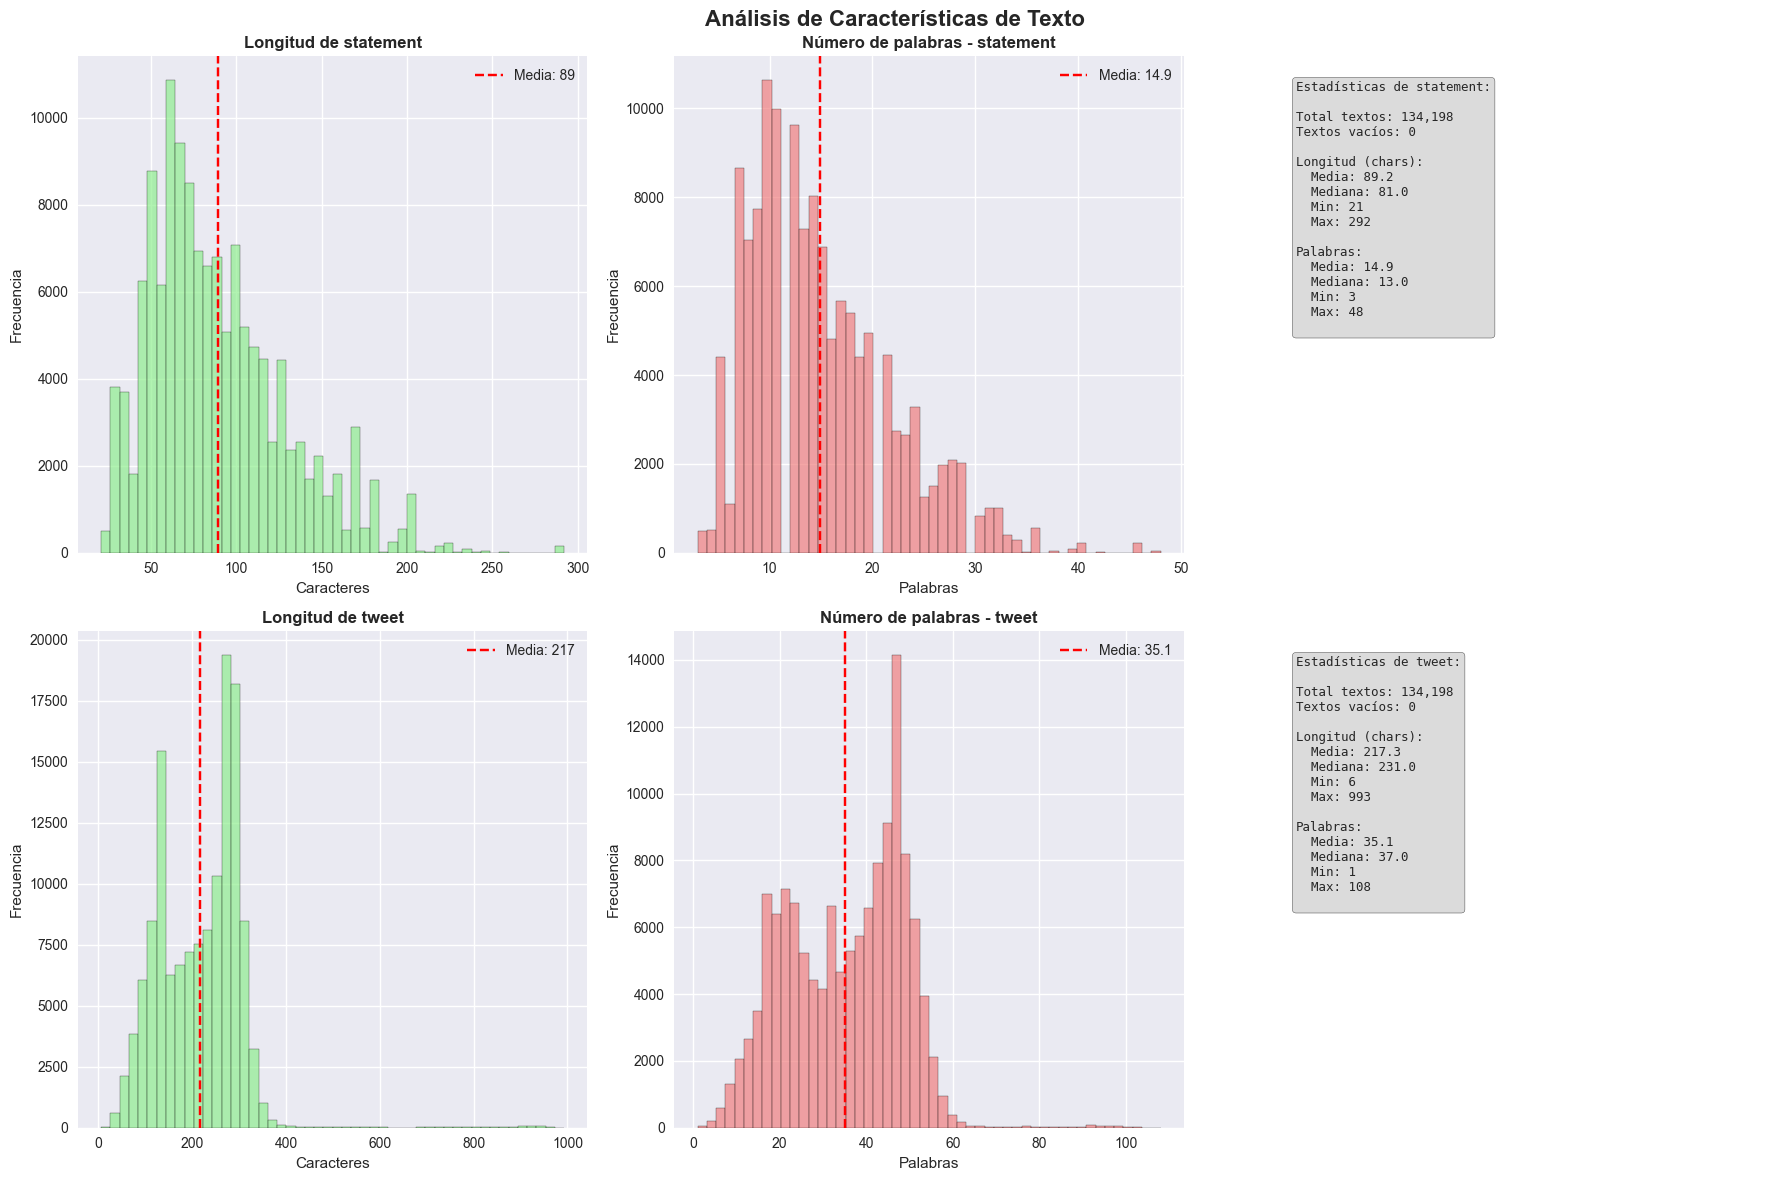

In [17]:
# ANÁLISIS 13: Análisis básico de texto (si está disponible)
if text_data is not None and not text_data.empty:
    print("Analizando datos de texto...")
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for i, text_col in enumerate(['statement', 'tweet']):
        if text_col in text_data.columns and i < len(axes):
            # Longitud de textos
            text_lengths = text_data[text_col].fillna('').str.len()
            
            axes[i*3].hist(text_lengths, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
            axes[i*3].set_title(f'Longitud de {text_col}', fontweight='bold')
            axes[i*3].set_xlabel('Caracteres')
            axes[i*3].set_ylabel('Frecuencia')
            axes[i*3].axvline(text_lengths.mean(), color='red', linestyle='--', 
                             label=f'Media: {text_lengths.mean():.0f}')
            axes[i*3].legend()
            
            # Número de palabras
            word_counts = text_data[text_col].fillna('').str.split().str.len()
            
            axes[i*3+1].hist(word_counts, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
            axes[i*3+1].set_title(f'Número de palabras - {text_col}', fontweight='bold')
            axes[i*3+1].set_xlabel('Palabras')
            axes[i*3+1].set_ylabel('Frecuencia')
            axes[i*3+1].axvline(word_counts.mean(), color='red', linestyle='--', 
                               label=f'Media: {word_counts.mean():.1f}')
            axes[i*3+1].legend()
            
            # Estadísticas de texto
            stats_text = f"Estadísticas de {text_col}:\n\n"
            stats_text += f"Total textos: {len(text_data):,}\n"
            stats_text += f"Textos vacíos: {text_data[text_col].isna().sum():,}\n\n"
            stats_text += f"Longitud (chars):\n"
            stats_text += f"  Media: {text_lengths.mean():.1f}\n"
            stats_text += f"  Mediana: {text_lengths.median():.1f}\n"
            stats_text += f"  Min: {text_lengths.min()}\n"
            stats_text += f"  Max: {text_lengths.max()}\n\n"
            stats_text += f"Palabras:\n"
            stats_text += f"  Media: {word_counts.mean():.1f}\n"
            stats_text += f"  Mediana: {word_counts.median():.1f}\n"
            stats_text += f"  Min: {word_counts.min()}\n"
            stats_text += f"  Max: {word_counts.max()}\n"
            
            axes[i*3+2].text(0.05, 0.95, stats_text, transform=axes[i*3+2].transAxes, 
                            verticalalignment='top', fontfamily='monospace', fontsize=9,
                            bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
            axes[i*3+2].axis('off')
    
    plt.suptitle('Análisis de Características de Texto', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

else:
    print("Datos de texto no disponibles para análisis")

## 9. Resumen y Conclusiones del Análisis Visual

In [18]:
# ANÁLISIS 14: Dashboard de resumen
print("="*80)
print("RESUMEN EJECUTIVO DEL ANÁLISIS VISUAL EXPLORATORIO")
print("="*80)

# 1. Estadísticas generales
print(f"\nESTADÍSTICAS GENERALES:")
print(f"   - Total de muestras: {len(df_original):,}")
print(f"   - Total de características: {len(df_original.columns)}")
print(f"   - Características numéricas: {len(numeric_features)}")
print(f"   - Memoria utilizada: {df_original.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

# 2. Balance de clases
if 'BinaryNumTarget' in df_original.columns:
    class_counts = df_original['BinaryNumTarget'].value_counts().sort_index()
    imbalance_ratio = class_counts.max() / class_counts.min()
    print(f"\nBALANCE DE CLASES:")
    for clase in class_counts.index:
        count = class_counts[clase]
        prop = count / len(df_original) * 100
        label = "Falso" if clase == 0 else "Verdadero"
        print(f"   • Clase {clase} ({label}): {count:,} ({prop:.1f}%)")
    print(f"   • Ratio de desbalance: {imbalance_ratio:.2f}:1")

# 3. Outliers principales
print(f"\nOUTLIERS DETECTADOS:")
key_vars = ['followers_count', 'friends_count', 'favourites_count']
available_vars = [var for var in key_vars if var in df_original.columns]

total_extreme_outliers = 0
for var in available_vars:
    z_scores = np.abs(zscore(df_original[var], nan_policy='omit'))
    extreme = (z_scores >= 3).sum()
    total_extreme_outliers += extreme
    print(f"   - {var}: {extreme:,} outliers extremos (>3σ)")

print(f"   - Total estimado de muestras con outliers extremos: {total_extreme_outliers:,}")

# 4. Características más variables
print(f"\nCARACTERÍSTICAS MÁS VARIABLES:")
cv_stats = []
for col in numeric_features[:20]:  # Top 20 para no sobrecargar
    if col in df_original.columns:
        data = df_original[col]
        cv = data.std() / data.mean() if data.mean() != 0 else 0
        cv_stats.append((col, cv))

cv_stats.sort(key=lambda x: x[1], reverse=True)
for i, (col, cv) in enumerate(cv_stats[:10]):
    print(f"   {i+1:2d}. {col:<25}: CV = {cv:.2f}")

# 5. Entidades más presentes
entity_cols = [col for col in df_original.columns if '_percentage' in col]
if entity_cols:
    print(f"\nENTIDADES MÁS PRESENTES:")
    entity_presence = []
    for col in entity_cols:
        presence = (df_original[col] > 0).sum() / len(df_original) * 100
        entity_presence.append((col.replace('_percentage', ''), presence))
    
    entity_presence.sort(key=lambda x: x[1], reverse=True)
    for i, (entity, presence) in enumerate(entity_presence[:10]):
        print(f"   {i+1:2d}. {entity:<15}: {presence:5.1f}% de textos")

# 6. Recomendaciones
print(f"\nRECOMENDACIONES PARA MODELADO:")
print(f"   - Aplicar técnicas de manejo de outliers (RobustScaler recomendado)")
print(f"   - Considerar transformaciones log para variables muy asimétricas")
print(f"   - Usar validación estratificada debido al desbalance de clases")
if imbalance_ratio > 3:
    print(f"   - Implementar técnicas de balanceamiento (SMOTE, class_weight)")
print(f"   - Considerar selección de características (muchas features disponibles)")
print(f"   - Evaluar con métricas balanceadas (F1-score, precision, recall)")

print(f"\nANÁLISIS VISUAL EXPLORATORIO COMPLETADO")
print(f"Se generaron {14} análisis visuales comprehensivos")
print(f"Datos listos para fase de modelado")
print("="*80)

RESUMEN EJECUTIVO DEL ANÁLISIS VISUAL EXPLORATORIO

ESTADÍSTICAS GENERALES:
   - Total de muestras: 134,198
   - Total de características: 64
   - Características numéricas: 58
   - Memoria utilizada: 124.3 MB

BALANCE DE CLASES:
   • Clase 0.0 (Falso): 65,268 (48.6%)
   • Clase 1.0 (Verdadero): 68,930 (51.4%)
   • Ratio de desbalance: 1.06:1

OUTLIERS DETECTADOS:
   - followers_count: 110 outliers extremos (>3σ)
   - friends_count: 1,078 outliers extremos (>3σ)
   - favourites_count: 2,832 outliers extremos (>3σ)
   - Total estimado de muestras con outliers extremos: 4,020

CARACTERÍSTICAS MÁS VARIABLES:
    1. favourites               : CV = 66.42
    2. replies                  : CV = 63.76
    3. retweets                 : CV = 60.91
    4. quotes                   : CV = 49.59
    5. followers_count          : CV = 38.74
    6. listed_count             : CV = 14.78
    7. BotScoreBinary           : CV = 5.47
    8. hashtags                 : CV = 4.38
    9. friends_count         